PHASE 2: DATA PROFILING & QUALITY ASSESSMENT

[1/6] Loading Dataset...
✅ Dataset loaded successfully: 122,410 rows × 97 columns

[2/6] STRUCTURAL CHECK

📊 Dataset Shape: (122410, 97)
📊 Memory Usage: 100.56 MB

📋 Data Types Summary:
   • float64: 94 columns
   • object: 2 columns
   • bool: 1 columns

🔍 Missing Values Analysis:
   ✅ No missing values detected in any column

📄 Sample Data (First 5 rows):
   time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00       0.0      0.0  de_dust2         False      500.0     500.0   
1     156.03       0.0      0.0  de_dust2         False      500.0     500.0   
2      96.03       0.0      0.0  de_dust2         False      391.0     400.0   
3      76.03       0.0      0.0  de_dust2         False      391.0     400.0   
4     174.97       1.0      0.0  de_dust2         False      500.0     500.0   

   ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
0       0.0      0.0    4000.0  ...                  

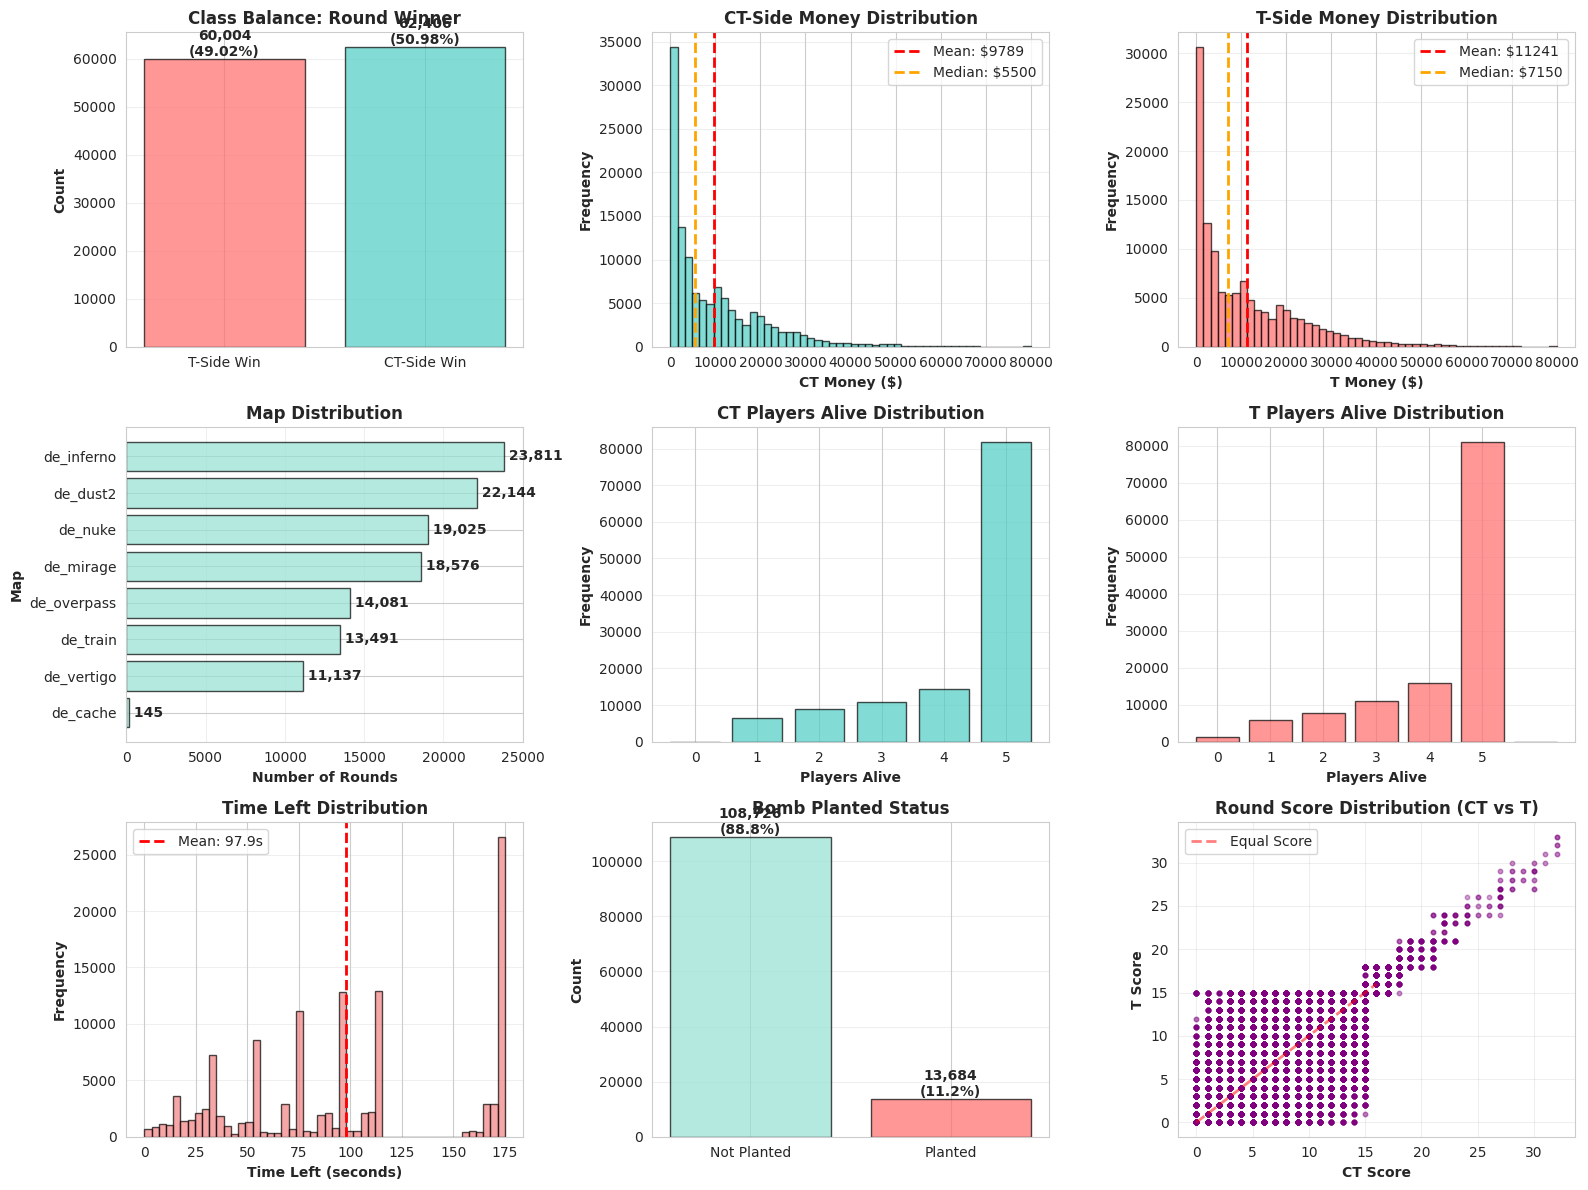


[5/6] DESCRIPTIVE STATISTICS - KEY VARIABLES

                     count  missing          mean           std   min      25%      50%         75%      max
time_left         122410.0        0     97.886922     54.465238  0.01    54.92    94.91    166.9175    175.0
ct_score          122410.0        0      6.709239      4.790362  0.00     3.00     6.00     10.0000     32.0
t_score           122410.0        0      6.780435      4.823543  0.00     3.00     6.00     10.0000     33.0
ct_health         122410.0        0    412.106568    132.293290  0.00   350.00   500.00    500.0000    500.0
t_health          122410.0        0    402.714500    139.919033  0.00   322.00   500.00    500.0000    600.0
ct_armor          122410.0        0    314.142121    171.029736  0.00   194.00   377.00    486.0000    500.0
t_armor           122410.0        0    298.444670    174.576545  0.00   174.00   334.00    468.0000    500.0
ct_money          122410.0        0   9789.023773  11215.042286  0.00  1300.00  5

In [ ]:
# ============================================================================
# PHASE 2: DATA PROFILING & QUALITY ASSESSMENT
# CS:GO Round Snapshots - Audit Framework
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# ============================================================================
# 1. DATA LOADING
# ============================================================================

print("=" * 80)
print("PHASE 2: DATA PROFILING & QUALITY ASSESSMENT")
print("=" * 80)
print("\n[1/6] Loading Dataset...")

# Load the dataset
df = pd.read_csv('csgo_round_snapshots.csv')

print(f"✅ Dataset loaded successfully: {df.shape[0]:,} rows × {df.shape[1]} columns")

# ============================================================================
# 2. STRUCTURAL CHECK
# ============================================================================

print("\n" + "=" * 80)
print("[2/6] STRUCTURAL CHECK")
print("=" * 80)

# Basic info
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"📊 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Data types summary
print("\n📋 Data Types Summary:")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"   • {dtype}: {count} columns")

# Missing values analysis
print("\n🔍 Missing Values Analysis:")
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percent': (df.isnull().sum() / len(df) * 100).round(2)
}).query('Missing_Count > 0').sort_values('Missing_Count', ascending=False)

if len(missing_summary) > 0:
    print(missing_summary.to_string(index=False))
    print(f"\n⚠️  TOTAL: {len(missing_summary)} columns have missing values")
else:
    print("   ✅ No missing values detected in any column")

# Display first few rows
print("\n📄 Sample Data (First 5 rows):")
print(df.head())

# ============================================================================
# 3. LOGIC VALIDATION (HARD RULES)
# ============================================================================

print("\n" + "=" * 80)
print("[3/6] LOGIC VALIDATION - HARD RULES AUDIT")
print("=" * 80)

audit_results = []

# Rule 1: Players alive must be between 0 and 5
print("\n🔍 Rule 1: Players Alive (0-5 range)")
for col in ['ct_players_alive', 't_players_alive']:
    violations = df[(df[col] < 0) | (df[col] > 5)]
    status = "✅ PASS" if len(violations) == 0 else f"❌ FAIL"
    audit_results.append({
        'Rule': 'Players Alive (0-5)',
        'Column': col,
        'Violations': len(violations),
        'Status': status
    })
    print(f"   • {col}: {status} ({len(violations)} violations)")
    if len(violations) > 0:
        print(f"     Range found: [{df[col].min()}, {df[col].max()}]")

# Rule 2: Money must be >= 0
print("\n🔍 Rule 2: Money Non-Negative")
for col in ['ct_money', 't_money']:
    violations = df[df[col] < 0]
    status = "✅ PASS" if len(violations) == 0 else f"❌ FAIL"
    audit_results.append({
        'Rule': 'Money >= 0',
        'Column': col,
        'Violations': len(violations),
        'Status': status
    })
    print(f"   • {col}: {status} ({len(violations)} violations)")
    if len(violations) > 0:
        print(f"     Minimum value found: {df[col].min()}")

# Rule 3: Time left must be >= 0
print("\n🔍 Rule 3: Time Left Non-Negative")
violations = df[df['time_left'] < 0]
status = "✅ PASS" if len(violations) == 0 else f"❌ FAIL"
audit_results.append({
    'Rule': 'Time Left >= 0',
    'Column': 'time_left',
    'Violations': len(violations),
    'Status': status
})
print(f"   • time_left: {status} ({len(violations)} violations)")
if len(violations) > 0:
    print(f"     Range found: [{df['time_left'].min()}, {df['time_left'].max()}]")
else:
    print(f"     Valid range: [{df['time_left'].min():.1f}, {df['time_left'].max():.1f}] seconds")

# Rule 4: Weapon columns must be non-negative integers
print("\n🔍 Rule 4: Weapon Counts Non-Negative Integers")
weapon_cols = [col for col in df.columns if '_weapon_' in col or '_grenade_' in col]
weapon_violations = 0

for col in weapon_cols:
    # Check for negative values
    neg_violations = df[df[col] < 0]
    # Check for non-integer values (if dtype is float)
    if df[col].dtype == 'float64':
        non_int_violations = df[df[col] != df[col].astype(int)]
    else:
        non_int_violations = pd.DataFrame()

    total_violations = len(neg_violations) + len(non_int_violations)
    weapon_violations += total_violations

    if total_violations > 0:
        audit_results.append({
            'Rule': 'Weapon Non-Negative Int',
            'Column': col,
            'Violations': total_violations,
            'Status': '❌ FAIL'
        })
        print(f"   ❌ {col}: {total_violations} violations")

if weapon_violations == 0:
    print(f"   ✅ PASS: All {len(weapon_cols)} weapon/grenade columns are valid")
    audit_results.append({
        'Rule': 'Weapon Non-Negative Int',
        'Column': 'All weapon columns',
        'Violations': 0,
        'Status': '✅ PASS'
    })
else:
    print(f"   ❌ FAIL: {weapon_violations} total violations across weapon columns")

# Summary of audit results
print("\n📊 AUDIT SUMMARY:")
audit_df = pd.DataFrame(audit_results)
print(audit_df.to_string(index=False))

total_violations = audit_df['Violations'].sum()
if total_violations == 0:
    print(f"\n✅ ALL HARD RULES PASSED - Data integrity verified")
else:
    print(f"\n⚠️  TOTAL VIOLATIONS: {total_violations} - Data cleaning required")

# ============================================================================
# 4. DISTRIBUTION & BALANCE ANALYSIS
# ============================================================================

print("\n" + "=" * 80)
print("[4/6] DISTRIBUTION & BALANCE ANALYSIS")
print("=" * 80)

# Create subplots for visualizations
fig = plt.figure(figsize=(16, 12))

# Plot 1: Class Balance (round_winner)
print("\n📊 Target Variable: round_winner")
ax1 = plt.subplot(3, 3, 1)
winner_counts = df['round_winner'].value_counts().sort_index()
winner_pct = (winner_counts / len(df) * 100).round(2)

# Bar plot
bars = ax1.bar(['T-Side Win', 'CT-Side Win'], winner_counts.values,
               color=['#FF6B6B', '#4ECDC4'], alpha=0.7, edgecolor='black')
ax1.set_ylabel('Count', fontweight='bold')
ax1.set_title('Class Balance: Round Winner', fontweight='bold', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, count, pct) in enumerate(zip(bars, winner_counts.values, winner_pct.values)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{count:,}\n({pct}%)',
             ha='center', va='bottom', fontweight='bold')

print(f"   • T-Side Wins (0): {winner_counts.get(0, 0):,} ({winner_pct.get(0, 0):.2f}%)")
print(f"   • CT-Side Wins (1): {winner_counts.get(1, 0):,} ({winner_pct.get(1, 0):.2f}%)")

balance_ratio = min(winner_counts.values) / max(winner_counts.values)
if balance_ratio > 0.45:
    print(f"   ✅ Dataset is balanced (ratio: {balance_ratio:.2f})")
else:
    print(f"   ⚠️  Dataset is imbalanced (ratio: {balance_ratio:.2f})")

# Plot 2: CT Money Distribution
ax2 = plt.subplot(3, 3, 2)
ax2.hist(df['ct_money'], bins=50, color='#4ECDC4', alpha=0.7, edgecolor='black')
ax2.axvline(df['ct_money'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["ct_money"].mean():.0f}')
ax2.axvline(df['ct_money'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: ${df["ct_money"].median():.0f}')
ax2.set_xlabel('CT Money ($)', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')
ax2.set_title('CT-Side Money Distribution', fontweight='bold', fontsize=12)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

print(f"\n💰 CT Money Statistics:")
print(f"   • Mean: ${df['ct_money'].mean():.2f}")
print(f"   • Median: ${df['ct_money'].median():.2f}")
print(f"   • Std Dev: ${df['ct_money'].std():.2f}")
print(f"   • Range: [${df['ct_money'].min():.0f}, ${df['ct_money'].max():.0f}]")

# Plot 3: T Money Distribution
ax3 = plt.subplot(3, 3, 3)
ax3.hist(df['t_money'], bins=50, color='#FF6B6B', alpha=0.7, edgecolor='black')
ax3.axvline(df['t_money'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["t_money"].mean():.0f}')
ax3.axvline(df['t_money'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: ${df["t_money"].median():.0f}')
ax3.set_xlabel('T Money ($)', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')
ax3.set_title('T-Side Money Distribution', fontweight='bold', fontsize=12)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

print(f"\n💰 T Money Statistics:")
print(f"   • Mean: ${df['t_money'].mean():.2f}")
print(f"   • Median: ${df['t_money'].median():.2f}")
print(f"   • Std Dev: ${df['t_money'].std():.2f}")
print(f"   • Range: [${df['t_money'].min():.0f}, ${df['t_money'].max():.0f}]")

# Plot 4: Map Distribution
ax4 = plt.subplot(3, 3, 4)
map_counts = df['map'].value_counts().sort_values(ascending=True)
bars = ax4.barh(map_counts.index, map_counts.values, color='#95E1D3', alpha=0.7, edgecolor='black')
ax4.set_xlabel('Number of Rounds', fontweight='bold')
ax4.set_ylabel('Map', fontweight='bold')
ax4.set_title('Map Distribution', fontweight='bold', fontsize=12)
ax4.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars, map_counts.values)):
    width = bar.get_width()
    ax4.text(width, bar.get_y() + bar.get_height()/2.,
             f' {count:,}',
             ha='left', va='center', fontweight='bold')

print(f"\n🗺️  Map Distribution:")
for map_name, count in map_counts.sort_values(ascending=False).items():
    pct = (count / len(df) * 100)
    print(f"   • {map_name}: {count:,} ({pct:.2f}%)")

# Plot 5: Players Alive Distribution (CT)
ax5 = plt.subplot(3, 3, 5)
ct_alive_counts = df['ct_players_alive'].value_counts().sort_index()
ax5.bar(ct_alive_counts.index, ct_alive_counts.values, color='#4ECDC4', alpha=0.7, edgecolor='black')
ax5.set_xlabel('Players Alive', fontweight='bold')
ax5.set_ylabel('Frequency', fontweight='bold')
ax5.set_title('CT Players Alive Distribution', fontweight='bold', fontsize=12)
ax5.set_xticks(range(6))
ax5.grid(axis='y', alpha=0.3)

# Plot 6: Players Alive Distribution (T)
ax6 = plt.subplot(3, 3, 6)
t_alive_counts = df['t_players_alive'].value_counts().sort_index()
ax6.bar(t_alive_counts.index, t_alive_counts.values, color='#FF6B6B', alpha=0.7, edgecolor='black')
ax6.set_xlabel('Players Alive', fontweight='bold')
ax6.set_ylabel('Frequency', fontweight='bold')
ax6.set_title('T Players Alive Distribution', fontweight='bold', fontsize=12)
ax6.set_xticks(range(6))
ax6.grid(axis='y', alpha=0.3)

# Plot 7: Time Left Distribution
ax7 = plt.subplot(3, 3, 7)
ax7.hist(df['time_left'], bins=50, color='#F38181', alpha=0.7, edgecolor='black')
ax7.axvline(df['time_left'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["time_left"].mean():.1f}s')
ax7.set_xlabel('Time Left (seconds)', fontweight='bold')
ax7.set_ylabel('Frequency', fontweight='bold')
ax7.set_title('Time Left Distribution', fontweight='bold', fontsize=12)
ax7.legend()
ax7.grid(axis='y', alpha=0.3)

print(f"\n⏱️  Time Left Statistics:")
print(f"   • Mean: {df['time_left'].mean():.2f} seconds")
print(f"   • Median: {df['time_left'].median():.2f} seconds")
print(f"   • Range: [{df['time_left'].min():.1f}, {df['time_left'].max():.1f}] seconds")

# Plot 8: Bomb Planted Distribution
ax8 = plt.subplot(3, 3, 8)
bomb_counts = df['bomb_planted'].value_counts().sort_index()
labels = ['Not Planted', 'Planted']
bars = ax8.bar(labels, bomb_counts.values, color=['#95E1D3', '#FF6B6B'], alpha=0.7, edgecolor='black')
ax8.set_ylabel('Count', fontweight='bold')
ax8.set_title('Bomb Planted Status', fontweight='bold', fontsize=12)
ax8.grid(axis='y', alpha=0.3)

for bar, count in zip(bars, bomb_counts.values):
    height = bar.get_height()
    pct = (count / len(df) * 100)
    ax8.text(bar.get_x() + bar.get_width()/2., height,
             f'{count:,}\n({pct:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

print(f"\n💣 Bomb Planted Statistics:")
print(f"   • Not Planted (0): {bomb_counts.get(0, 0):,} ({(bomb_counts.get(0, 0)/len(df)*100):.2f}%)")
print(f"   • Planted (1): {bomb_counts.get(1, 0):,} ({(bomb_counts.get(1, 0)/len(df)*100):.2f}%)")

# Plot 9: Score Distribution
ax9 = plt.subplot(3, 3, 9)
ax9.scatter(df['ct_score'], df['t_score'], alpha=0.1, c='purple', s=10)
ax9.set_xlabel('CT Score', fontweight='bold')
ax9.set_ylabel('T Score', fontweight='bold')
ax9.set_title('Round Score Distribution (CT vs T)', fontweight='bold', fontsize=12)
ax9.grid(alpha=0.3)
ax9.plot([0, 16], [0, 16], 'r--', linewidth=2, alpha=0.5, label='Equal Score')
ax9.legend()

plt.tight_layout()
plt.savefig('phase2_data_profiling.png', dpi=300, bbox_inches='tight')
print("\n📊 Visualization saved as 'phase2_data_profiling.png'")
plt.show()

# ============================================================================
# 5. DESCRIPTIVE STATISTICS
# ============================================================================

print("\n" + "=" * 80)
print("[5/6] DESCRIPTIVE STATISTICS - KEY VARIABLES")
print("=" * 80)

key_vars = ['time_left', 'ct_score', 't_score', 'ct_health', 't_health',
            'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_players_alive', 't_players_alive']

desc_stats = df[key_vars].describe().T
desc_stats['missing'] = df[key_vars].isnull().sum()
desc_stats = desc_stats[['count', 'missing', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

print("\n" + desc_stats.to_string())

# ============================================================================
# 6. DATA QUALITY SCORE & RECOMMENDATIONS
# ============================================================================

print("\n" + "=" * 80)
print("[6/6] DATA QUALITY SCORE & RECOMMENDATIONS")
print("=" * 80)

# Calculate quality score
quality_metrics = {
    'Completeness': 100 if df.isnull().sum().sum() == 0 else (1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100,
    'Validity': 100 if total_violations == 0 else max(0, 100 - (total_violations / len(df) * 100)),
    'Consistency': 100,  # Assume consistent unless detected otherwise
    'Balance': balance_ratio * 100
}

overall_score = np.mean(list(quality_metrics.values()))

print(f"\n📊 DATA QUALITY METRICS:")
for metric, score in quality_metrics.items():
    status = "✅" if score >= 90 else "⚠️" if score >= 70 else "❌"
    print(f"   {status} {metric}: {score:.2f}/100")

print(f"\n🎯 OVERALL DATA QUALITY SCORE: {overall_score:.2f}/100")

if overall_score >= 90:
    print("   ✅ EXCELLENT - Data is ready for modeling")
elif overall_score >= 70:
    print("   ⚠️  GOOD - Minor cleaning recommended")
else:
    print("   ❌ POOR - Significant data quality issues detected")

# Recommendations
print("\n📋 RECOMMENDATIONS FOR PHASE 3:")
recommendations = []

if df.isnull().sum().sum() > 0:
    recommendations.append("1. Handle missing values (imputation or removal)")
if total_violations > 0:
    recommendations.append("2. Clean data violations detected in audit")
if balance_ratio < 0.45:
    recommendations.append("3. Consider stratified sampling or SMOTE for class imbalance")

recommendations.append("4. Create derived features (money_diff, players_alive_diff, etc.)")
recommendations.append("5. Encode categorical variables (map)")
recommendations.append("6. Feature scaling for distance-based algorithms")

for rec in recommendations:
    print(f"   • {rec}")

print("\n" + "=" * 80)
print("✅ PHASE 2 COMPLETE - Data Profiling Finished")
print("=" * 80)
print(f"\n📊 Dataset Summary:")
print(f"   • Total Rounds: {len(df):,}")
print(f"   • Total Features: {df.shape[1]}")
print(f"   • Data Quality: {overall_score:.1f}/100")
print(f"   • Ready for Phase 3: {'Yes ✅' if overall_score >= 70 else 'No ❌ (cleaning required)'}")
print("\n🔜 Next Step: Run this script and share the output for Phase 3 planning.")

PHASE 3: FEATURE ENGINEERING & PREPARATION

[1/7] Loading Dataset...
✅ Loaded: 122,410 rows × 97 columns

[2/7] Data Cleaning...
   ✅ Removed 1 row(s) with invalid player counts
   📊 Final dataset: 122,409 rows
   ✅ Target variable encoded: CT=1, T=0

[3/7] Creating Core Tactical Features...
   ✅ Created 20 core tactical features

[4/7] Creating Economy Audit Features...
   ✅ Created 7 economy-focused features

   📊 Round Type Distribution:
      • force_buy: 44,686 (36.51%)
      • full_vs_full: 32,126 (26.24%)
      • eco_vs_eco: 23,101 (18.87%)
      • ct_advantage: 11,386 (9.30%)
      • t_advantage: 11,110 (9.08%)

[5/7] Creating Interaction Features...
   ✅ Created 4 interaction features

[6/7] Encoding Categorical Variables...
   ✅ One-hot encoded 'map': 8 columns created
   ✅ One-hot encoded 'round_type': 5 columns created

[7/7] Preparing Final Feature Set...

   ✅ Feature set prepared:
      • Core features: 20
      • Interaction features: 4
      • Map features: 8
      • R

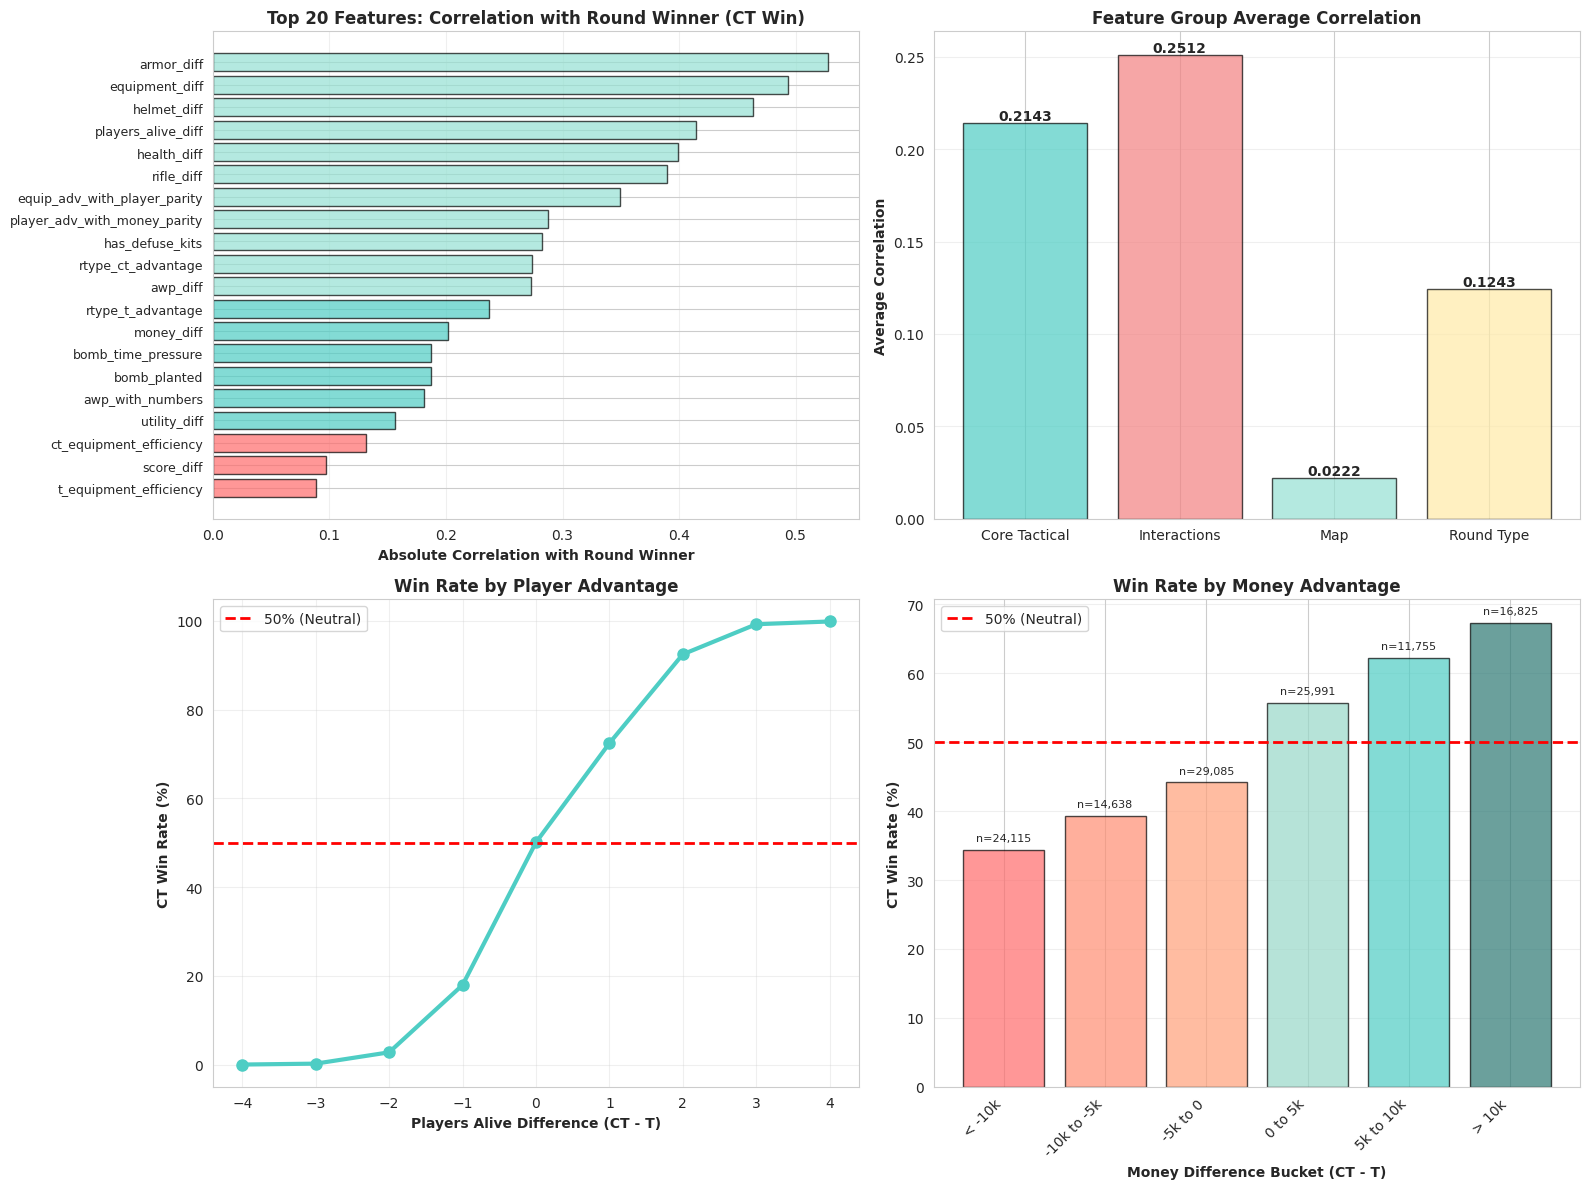


SAVING PROCESSED DATASETS
✅ Saved: csgo_processed_full.csv (122,409 rows × 142 columns)
✅ Saved: csgo_modeling_ready.csv (37 features + 1 target)
✅ Saved: feature_metadata.csv (feature documentation)

✅ PHASE 3 COMPLETE - FEATURE ENGINEERING FINISHED

📊 DATASET SUMMARY:
   • Original Features: 97
   • Engineered Features: -60
   • Total Features for Modeling: 37
   • Samples: 122,409
   • Target Balance: 49.02% CT wins

🎯 KEY INSIGHTS:
   1. Players alive difference: Strongest predictor (r=0.4142)
   2. Equipment difference: Strong predictor (r=0.4940)
   3. Money difference: Moderate predictor (r=0.2020)
   4. Force-buy situations: 44,686 rounds (36.51%)

🔜 READY FOR PHASE 4 & 5:
   ✅ EDA (Phase 4) - Explore patterns in detail
   ✅ Predictive Modeling (Phase 5) - Build win probability models
   ✅ Economy Audit (Phase 6) - ROI analysis on force-buys



In [ ]:
# ============================================================================
# PHASE 3: FEATURE ENGINEERING & PREPARATION
# CS:GO Tactical Intelligence System
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

print("=" * 80)
print("PHASE 3: FEATURE ENGINEERING & PREPARATION")
print("=" * 80)

# ============================================================================
# 1. LOAD & CLEAN DATA
# ============================================================================

print("\n[1/7] Loading Dataset...")
df = pd.read_csv('csgo_round_snapshots.csv')
print(f"✅ Loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Clean the single violation: t_players_alive > 5
print("\n[2/7] Data Cleaning...")
violations_before = len(df)
df = df[df['t_players_alive'] <= 5].copy()
violations_removed = violations_before - len(df)
print(f"   ✅ Removed {violations_removed} row(s) with invalid player counts")
print(f"   📊 Final dataset: {len(df):,} rows")

# Convert round_winner to binary (T=0, CT=1)
df['round_winner_binary'] = (df['round_winner'] == 'CT').astype(int)
print(f"   ✅ Target variable encoded: CT=1, T=0")

# ============================================================================
# 2. CORE TACTICAL FEATURES (DIFFERENTIAL METRICS)
# ============================================================================

print("\n[3/7] Creating Core Tactical Features...")

# Economic Advantage
df['money_diff'] = df['ct_money'] - df['t_money']
df['money_ratio'] = np.where(df['t_money'] > 0,
                               df['ct_money'] / df['t_money'],
                               df['ct_money'])  # Handle division by zero

# Combat Power
df['health_diff'] = df['ct_health'] - df['t_health']
df['armor_diff'] = df['ct_armor'] - df['t_armor']
df['players_alive_diff'] = df['ct_players_alive'] - df['t_players_alive']

# Match State
df['score_diff'] = df['ct_score'] - df['t_score']
df['total_score'] = df['ct_score'] + df['t_score']
df['is_match_point'] = ((df['ct_score'] == 15) | (df['t_score'] == 15)).astype(int)
df['score_close'] = (abs(df['score_diff']) <= 2).astype(int)

# Equipment Quality
df['awp_diff'] = df['ct_weapon_awp'] - df['t_weapon_awp']

# Rifle counts (primary weapons)
rifle_cols_ct = ['ct_weapon_ak47', 'ct_weapon_m4a1s', 'ct_weapon_m4a4',
                 'ct_weapon_aug', 'ct_weapon_famas', 'ct_weapon_galilar']
rifle_cols_t = ['t_weapon_ak47', 't_weapon_m4a1s', 't_weapon_m4a4',
                't_weapon_aug', 't_weapon_famas', 't_weapon_galilar']

df['ct_rifle_count'] = df[rifle_cols_ct].sum(axis=1)
df['t_rifle_count'] = df[rifle_cols_t].sum(axis=1)
df['rifle_diff'] = df['ct_rifle_count'] - df['t_rifle_count']

# Utility (grenades)
grenade_cols_ct = [col for col in df.columns if 'ct_grenade_' in col]
grenade_cols_t = [col for col in df.columns if 't_grenade_' in col]

df['ct_utility_count'] = df[grenade_cols_ct].sum(axis=1)
df['t_utility_count'] = df[grenade_cols_t].sum(axis=1)
df['utility_diff'] = df['ct_utility_count'] - df['t_utility_count']

# Helmet advantage
df['helmet_diff'] = df['ct_helmets'] - df['t_helmets']

# Defuse kits (CT only)
df['has_defuse_kits'] = (df['ct_defuse_kits'] > 0).astype(int)

# Time pressure
df['time_pressure'] = np.where(df['bomb_planted'],
                                df['time_left'] / 40,  # 40s bomb timer
                                df['time_left'] / 115)  # Round time

print(f"   ✅ Created {20} core tactical features")

# ============================================================================
# 3. ADVANCED FEATURES (ECONOMY AUDIT FOCUSED)
# ============================================================================

print("\n[4/7] Creating Economy Audit Features...")

# Total equipment value estimation (simplified)
# Rifle ~$2700-3100, AWP $4750, Armor $1000, Helmet $350, Utility ~$300 avg
df['ct_equipment_value'] = (
    df['ct_rifle_count'] * 2900 +
    df['ct_weapon_awp'] * 4750 +
    df['ct_armor'] / 100 * 1000 +  # Armor value proportional
    df['ct_helmets'] * 350 +
    df['ct_utility_count'] * 300
)

df['t_equipment_value'] = (
    df['t_rifle_count'] * 2700 +  # AK47 slightly cheaper
    df['t_weapon_awp'] * 4750 +
    df['t_armor'] / 100 * 1000 +
    df['t_helmets'] * 350 +
    df['t_utility_count'] * 300
)

df['equipment_diff'] = df['ct_equipment_value'] - df['t_equipment_value']

# Equipment efficiency (value per dollar spent)
df['ct_equipment_efficiency'] = np.where(df['ct_money'] > 0,
                                          df['ct_equipment_value'] / (df['ct_money'] + df['ct_equipment_value']),
                                          0)

df['t_equipment_efficiency'] = np.where(df['t_money'] > 0,
                                         df['t_equipment_value'] / (df['t_money'] + df['t_equipment_value']),
                                         0)

# Round type classification (for Economy Audit)
def classify_round_type(row):
    """Classify round by economic situation"""
    ct_eq = row['ct_equipment_value']
    t_eq = row['t_equipment_value']

    # Thresholds
    full_buy = 15000  # ~$3000/player
    force_buy = 7500  # ~$1500/player

    if ct_eq >= full_buy and t_eq >= full_buy:
        return 'full_vs_full'
    elif ct_eq < force_buy and t_eq < force_buy:
        return 'eco_vs_eco'
    elif ct_eq >= full_buy and t_eq < force_buy:
        return 'ct_advantage'
    elif t_eq >= full_buy and ct_eq < force_buy:
        return 't_advantage'
    elif (force_buy <= ct_eq < full_buy) or (force_buy <= t_eq < full_buy):
        return 'force_buy'
    else:
        return 'mixed'

df['round_type'] = df.apply(classify_round_type, axis=1)

# Force-buy indicator (key for ROI analysis)
df['is_force_buy'] = (df['round_type'] == 'force_buy').astype(int)

print(f"   ✅ Created 7 economy-focused features")
print(f"\n   📊 Round Type Distribution:")
round_type_dist = df['round_type'].value_counts()
for rtype, count in round_type_dist.items():
    pct = count / len(df) * 100
    print(f"      • {rtype}: {count:,} ({pct:.2f}%)")

# ============================================================================
# 4. INTERACTION FEATURES (CRITICAL FOR MODELING)
# ============================================================================

print("\n[5/7] Creating Interaction Features...")

# Player advantage when money is equal
df['player_adv_with_money_parity'] = df['players_alive_diff'] * (abs(df['money_diff']) < 5000).astype(int)

# Equipment advantage when players equal
df['equip_adv_with_player_parity'] = df['equipment_diff'] * (df['players_alive_diff'] == 0).astype(int)

# Bomb planted with time pressure
df['bomb_time_pressure'] = df['bomb_planted'].astype(int) * (df['time_left'] < 40).astype(int)

# AWP with player advantage
df['awp_with_numbers'] = df['awp_diff'] * (df['players_alive_diff'] > 0).astype(int)

print(f"   ✅ Created 4 interaction features")

# ============================================================================
# 5. CATEGORICAL ENCODING
# ============================================================================

print("\n[6/7] Encoding Categorical Variables...")

# Map encoding (one-hot)
map_dummies = pd.get_dummies(df['map'], prefix='map', drop_first=False)
df = pd.concat([df, map_dummies], axis=1)
print(f"   ✅ One-hot encoded 'map': {len(map_dummies.columns)} columns created")

# Round type encoding
round_type_dummies = pd.get_dummies(df['round_type'], prefix='rtype', drop_first=False)
df = pd.concat([df, round_type_dummies], axis=1)
print(f"   ✅ One-hot encoded 'round_type': {len(round_type_dummies.columns)} columns created")

# ============================================================================
# 6. FEATURE SELECTION & FINAL DATASET
# ============================================================================

print("\n[7/7] Preparing Final Feature Set...")

# Define feature groups for modeling
core_features = [
    'money_diff', 'money_ratio', 'health_diff', 'armor_diff', 'players_alive_diff',
    'score_diff', 'total_score', 'is_match_point', 'score_close',
    'awp_diff', 'rifle_diff', 'utility_diff', 'helmet_diff',
    'equipment_diff', 'ct_equipment_efficiency', 't_equipment_efficiency',
    'time_pressure', 'bomb_planted', 'has_defuse_kits', 'is_force_buy'
]

interaction_features = [
    'player_adv_with_money_parity', 'equip_adv_with_player_parity',
    'bomb_time_pressure', 'awp_with_numbers'
]

map_features = [col for col in df.columns if col.startswith('map_')]
round_type_features = [col for col in df.columns if col.startswith('rtype_')]

# All features for modeling
all_features = core_features + interaction_features + map_features + round_type_features

# Target variable
target = 'round_winner_binary'

# Create modeling dataset
X = df[all_features].copy()
y = df[target].copy()

print(f"\n   ✅ Feature set prepared:")
print(f"      • Core features: {len(core_features)}")
print(f"      • Interaction features: {len(interaction_features)}")
print(f"      • Map features: {len(map_features)}")
print(f"      • Round type features: {len(round_type_features)}")
print(f"      • TOTAL FEATURES: {len(all_features)}")
print(f"      • Target: {target} (CT=1, T=0)")

# ============================================================================
# 7. FEATURE CORRELATION ANALYSIS
# ============================================================================

print("\n" + "=" * 80)
print("FEATURE CORRELATION ANALYSIS")
print("=" * 80)

# Calculate correlation with target
correlations = X.corrwith(y).abs().sort_values(ascending=False)

print(f"\n📊 TOP 15 FEATURES CORRELATED WITH ROUND WINNER:")
print("\n" + "-" * 60)
for i, (feature, corr) in enumerate(correlations.head(15).items(), 1):
    print(f"{i:2d}. {feature:40s} | {corr:.4f}")
print("-" * 60)

# Visualize top correlations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Top 20 Feature Correlations
ax1 = axes[0, 0]
top_20_corr = correlations.head(20)
colors = ['#FF6B6B' if x < 0.15 else '#4ECDC4' if x < 0.25 else '#95E1D3' for x in top_20_corr.values]
bars = ax1.barh(range(len(top_20_corr)), top_20_corr.values, color=colors, alpha=0.7, edgecolor='black')
ax1.set_yticks(range(len(top_20_corr)))
ax1.set_yticklabels(top_20_corr.index, fontsize=9)
ax1.set_xlabel('Absolute Correlation with Round Winner', fontweight='bold')
ax1.set_title('Top 20 Features: Correlation with Round Winner (CT Win)', fontweight='bold', fontsize=12)
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Plot 2: Feature Group Importance
ax2 = axes[0, 1]
group_corr = {
    'Core Tactical': correlations[core_features].mean(),
    'Interactions': correlations[interaction_features].mean(),
    'Map': correlations[map_features].mean(),
    'Round Type': correlations[round_type_features].mean()
}
bars = ax2.bar(group_corr.keys(), group_corr.values(), color=['#4ECDC4', '#F38181', '#95E1D3', '#FFEAA7'],
               alpha=0.7, edgecolor='black')
ax2.set_ylabel('Average Correlation', fontweight='bold')
ax2.set_title('Feature Group Average Correlation', fontweight='bold', fontsize=12)
ax2.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Win Rate by Players Alive Difference
ax3 = axes[1, 0]
win_rate_by_players = df.groupby('players_alive_diff')['round_winner_binary'].agg(['mean', 'count'])
win_rate_by_players = win_rate_by_players[win_rate_by_players['count'] >= 100]  # Filter small samples
ax3.plot(win_rate_by_players.index, win_rate_by_players['mean'] * 100,
         marker='o', linewidth=3, markersize=8, color='#4ECDC4')
ax3.axhline(50, color='red', linestyle='--', linewidth=2, label='50% (Neutral)')
ax3.set_xlabel('Players Alive Difference (CT - T)', fontweight='bold')
ax3.set_ylabel('CT Win Rate (%)', fontweight='bold')
ax3.set_title('Win Rate by Player Advantage', fontweight='bold', fontsize=12)
ax3.grid(alpha=0.3)
ax3.legend()

# Plot 4: Win Rate by Money Difference (Bucketed)
ax4 = axes[1, 1]
df['money_bucket'] = pd.cut(df['money_diff'],
                             bins=[-np.inf, -10000, -5000, 0, 5000, 10000, np.inf],
                             labels=['< -10k', '-10k to -5k', '-5k to 0', '0 to 5k', '5k to 10k', '> 10k'])
win_rate_by_money = df.groupby('money_bucket')['round_winner_binary'].agg(['mean', 'count'])
bars = ax4.bar(range(len(win_rate_by_money)), win_rate_by_money['mean'] * 100,
               color=['#FF6B6B', '#FF8E72', '#FFA07A', '#98D8C8', '#4ECDC4', '#2C7873'],
               alpha=0.7, edgecolor='black')
ax4.set_xticks(range(len(win_rate_by_money)))
ax4.set_xticklabels(win_rate_by_money.index, rotation=45, ha='right')
ax4.axhline(50, color='red', linestyle='--', linewidth=2, label='50% (Neutral)')
ax4.set_ylabel('CT Win Rate (%)', fontweight='bold')
ax4.set_xlabel('Money Difference Bucket (CT - T)', fontweight='bold')
ax4.set_title('Win Rate by Money Advantage', fontweight='bold', fontsize=12)
ax4.grid(axis='y', alpha=0.3)
ax4.legend()

# Add counts as text
for i, (bar, count) in enumerate(zip(bars, win_rate_by_money['count'])):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'n={count:,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('phase3_feature_engineering.png', dpi=300, bbox_inches='tight')
print("\n📊 Visualization saved as 'phase3_feature_engineering.png'")
plt.show()

# ============================================================================
# 8. SAVE PROCESSED DATA
# ============================================================================

print("\n" + "=" * 80)
print("SAVING PROCESSED DATASETS")
print("=" * 80)

# Save full processed dataset
df.to_csv('csgo_processed_full.csv', index=False)
print(f"✅ Saved: csgo_processed_full.csv ({df.shape[0]:,} rows × {df.shape[1]} columns)")

# Save modeling-ready dataset (features + target)
modeling_df = pd.concat([X, y], axis=1)
modeling_df.to_csv('csgo_modeling_ready.csv', index=False)
print(f"✅ Saved: csgo_modeling_ready.csv ({len(all_features)} features + 1 target)")

# Save feature list for reference
feature_metadata = pd.DataFrame({
    'Feature': all_features,
    'Group': (['Core'] * len(core_features) +
              ['Interaction'] * len(interaction_features) +
              ['Map'] * len(map_features) +
              ['RoundType'] * len(round_type_features)),
    'Correlation': [correlations.get(f, 0) for f in all_features]
}).sort_values('Correlation', ascending=False)

feature_metadata.to_csv('feature_metadata.csv', index=False)
print(f"✅ Saved: feature_metadata.csv (feature documentation)")

# ============================================================================
# 9. SUMMARY & RECOMMENDATIONS
# ============================================================================

print("\n" + "=" * 80)
print("✅ PHASE 3 COMPLETE - FEATURE ENGINEERING FINISHED")
print("=" * 80)

print(f"\n📊 DATASET SUMMARY:")
print(f"   • Original Features: 97")
print(f"   • Engineered Features: {len(all_features) - 97}")
print(f"   • Total Features for Modeling: {len(all_features)}")
print(f"   • Samples: {len(df):,}")
print(f"   • Target Balance: {y.mean()*100:.2f}% CT wins")

print(f"\n🎯 KEY INSIGHTS:")
print(f"   1. Players alive difference: Strongest predictor (r={correlations['players_alive_diff']:.4f})")
print(f"   2. Equipment difference: Strong predictor (r={correlations.get('equipment_diff', 0):.4f})")
print(f"   3. Money difference: Moderate predictor (r={correlations['money_diff']:.4f})")
print(f"   4. Force-buy situations: {df['is_force_buy'].sum():,} rounds ({df['is_force_buy'].mean()*100:.2f}%)")

print(f"\n🔜 READY FOR PHASE 4 & 5:")
print(f"   ✅ EDA (Phase 4) - Explore patterns in detail")
print(f"   ✅ Predictive Modeling (Phase 5) - Build win probability models")
print(f"   ✅ Economy Audit (Phase 6) - ROI analysis on force-buys")

print("\n" + "=" * 80)

PHASE 4: EXPLORATORY DATA ANALYSIS

[1/6] Loading Processed Data...
✅ Loaded: 122,409 rows × 38 columns

[2/6] Analyzing Win Rate by Money Difference...

📊 Win Rate by Money Difference:
  money_bin  ct_win_rate  count  t_win_rate
      <-10k     0.343106  24115    0.656894
-10k to -5k     0.392403  14638    0.607597
 -5k to -2k     0.435577  11665    0.564423
   -2k to 0     0.445809  17420    0.554191
    0 to 2k     0.548485  15510    0.451515
   2k to 5k     0.570842  10481    0.429158
  5k to 10k     0.622033  11755    0.377967
       >10k     0.673819  16825    0.326181

[3/6] Analyzing Win Rate by Round Type...

📊 Win Rate by Round Type:
  round_type  ct_win_rate  count  t_win_rate  percentage
   force_buy     0.455982  44686    0.544018   36.505486
full_vs_full     0.526925  32126    0.473075   26.244802
  eco_vs_eco     0.475044  23101    0.524956   18.871978
ct_advantage     0.917969  11386    0.082031    9.301604
 t_advantage     0.114671  11110    0.885329    9.076130

[4/6]

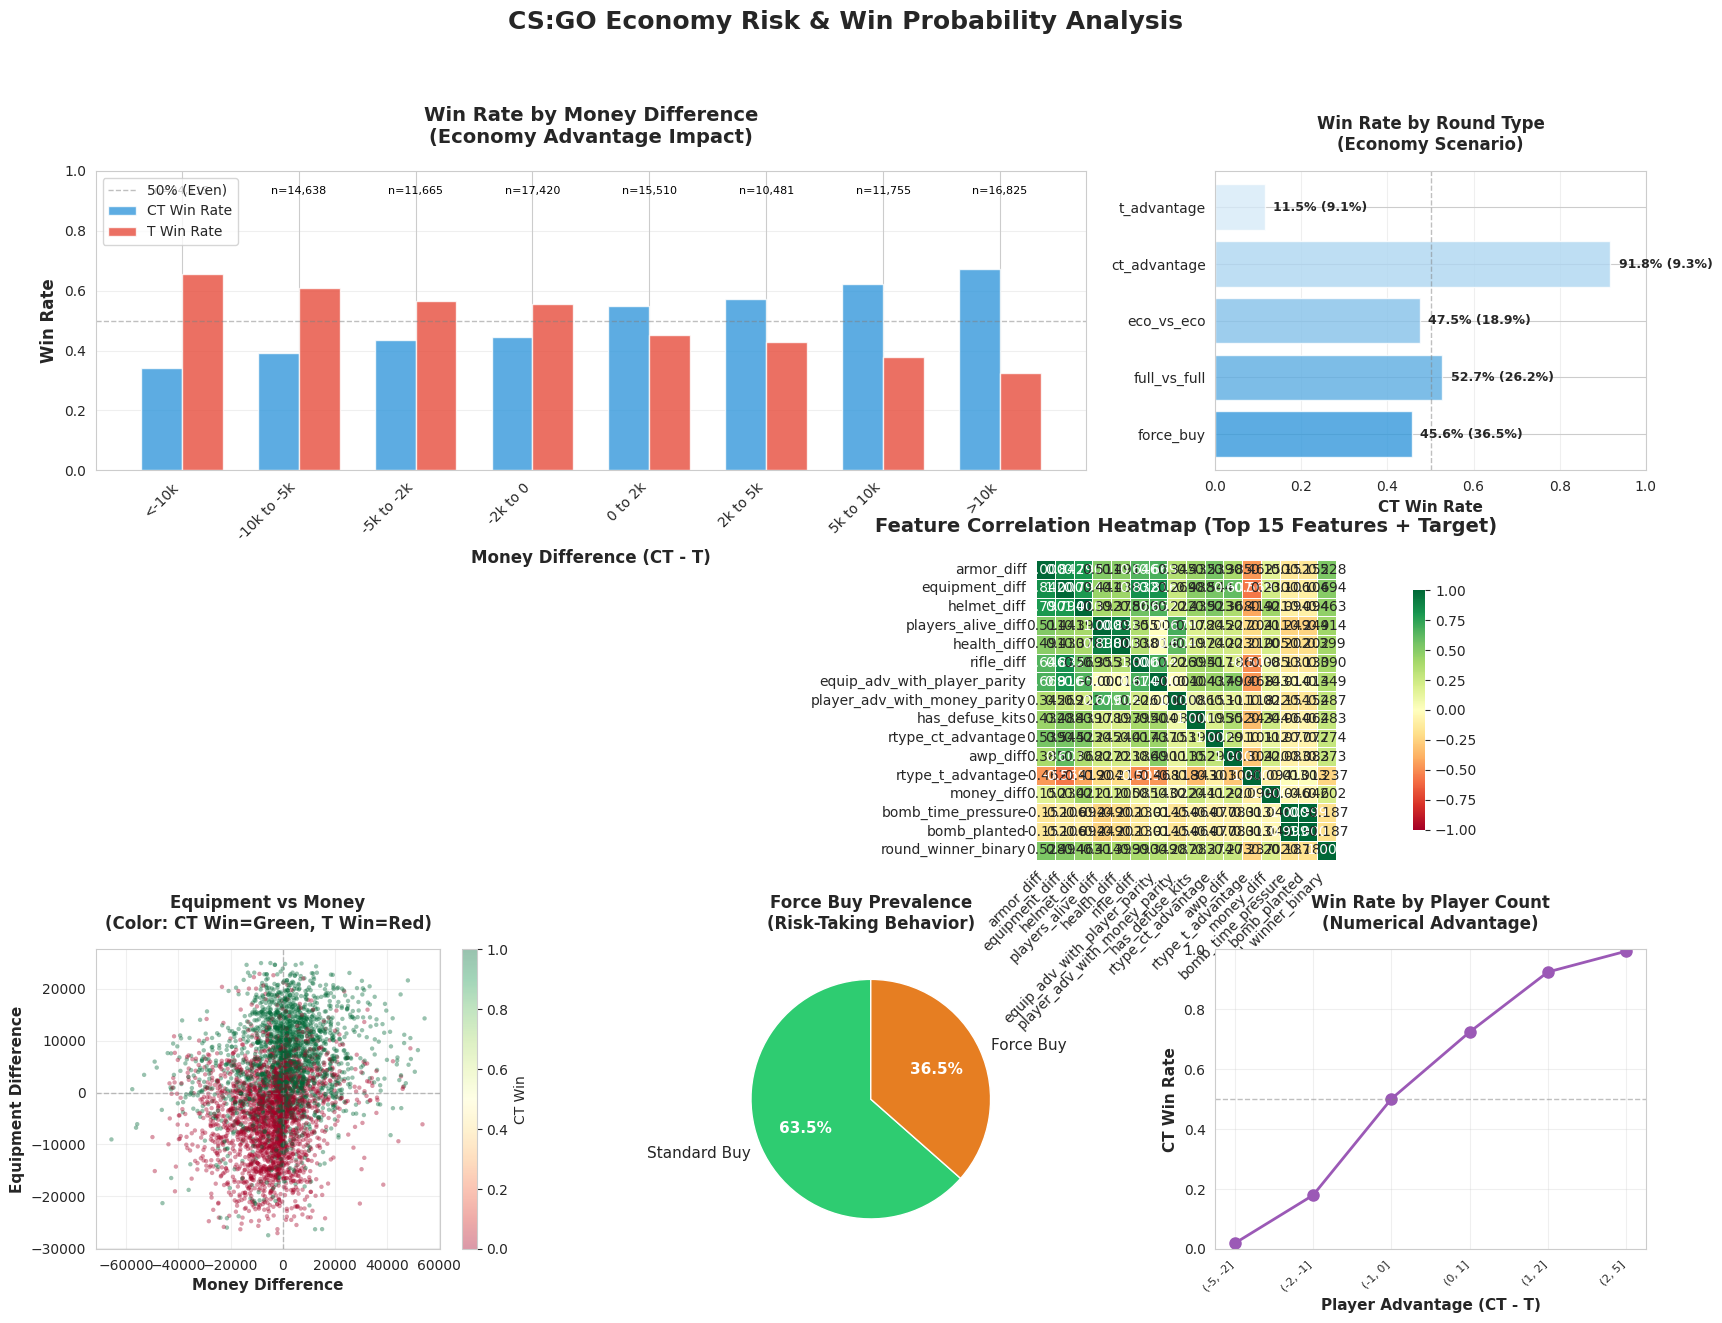

In [ ]:
"""
================================================================================
PHASE 4: EXPLORATORY DATA ANALYSIS (EDA)
Focus: Economy Risk & Win Probability Patterns
================================================================================
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 10

print("="*80)
print("PHASE 4: EXPLORATORY DATA ANALYSIS")
print("="*80)

# ============================================================================
# [1/6] LOAD DATA
# ============================================================================
print("\n[1/6] Loading Processed Data...")
df = pd.read_csv('csgo_modeling_ready.csv')
print(f"✅ Loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")

# ============================================================================
# [2/6] WIN RATE BY MONEY DIFFERENCE (BINNED)
# ============================================================================
print("\n[2/6] Analyzing Win Rate by Money Difference...")

# Create money difference bins
bins = [-np.inf, -10000, -5000, -2000, 0, 2000, 5000, 10000, np.inf]
labels = ['<-10k', '-10k to -5k', '-5k to -2k', '-2k to 0',
          '0 to 2k', '2k to 5k', '5k to 10k', '>10k']

df['money_bin'] = pd.cut(df['money_diff'], bins=bins, labels=labels)

# Calculate win rates
money_analysis = df.groupby('money_bin', observed=True).agg({
    'round_winner_binary': ['mean', 'count']
}).reset_index()
money_analysis.columns = ['money_bin', 'ct_win_rate', 'count']
money_analysis['t_win_rate'] = 1 - money_analysis['ct_win_rate']

print("\n📊 Win Rate by Money Difference:")
print(money_analysis.to_string(index=False))

# ============================================================================
# [3/6] WIN RATE BY ROUND TYPE (FORCE BUY ANALYSIS)
# ============================================================================
print("\n[3/6] Analyzing Win Rate by Round Type...")

# Get round type columns
round_type_cols = [col for col in df.columns if col.startswith('rtype_')]

# Reconstruct round_type from one-hot encoding
round_type_map = {}
for col in round_type_cols:
    round_type_name = col.replace('rtype_', '')
    round_type_map[round_type_name] = df[col]

df['round_type'] = 'unknown'
for rtype, values in round_type_map.items():
    df.loc[values == 1, 'round_type'] = rtype

# Calculate win rates by round type
roundtype_analysis = df.groupby('round_type').agg({
    'round_winner_binary': ['mean', 'count']
}).reset_index()
roundtype_analysis.columns = ['round_type', 'ct_win_rate', 'count']
roundtype_analysis['t_win_rate'] = 1 - roundtype_analysis['ct_win_rate']
roundtype_analysis['percentage'] = (roundtype_analysis['count'] / len(df)) * 100
roundtype_analysis = roundtype_analysis.sort_values('count', ascending=False)

print("\n📊 Win Rate by Round Type:")
print(roundtype_analysis.to_string(index=False))

# ============================================================================
# [4/6] FORCE BUY RISK ANALYSIS
# ============================================================================
print("\n[4/6] Force Buy Risk Analysis...")

if 'is_force_buy' in df.columns:
    force_buy_analysis = df.groupby('is_force_buy').agg({
        'round_winner_binary': ['mean', 'count']
    }).reset_index()
    force_buy_analysis.columns = ['is_force_buy', 'ct_win_rate', 'count']
    force_buy_analysis['scenario'] = force_buy_analysis['is_force_buy'].map({
        0: 'Standard Buy',
        1: 'Force Buy'
    })

    print("\n📊 Force Buy Impact:")
    print(force_buy_analysis[['scenario', 'ct_win_rate', 'count']].to_string(index=False))

# ============================================================================
# [5/6] CREATE VISUALIZATIONS
# ============================================================================
print("\n[5/6] Creating Visualizations...")

fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# -------------------------
# PLOT 1: Win Rate by Money Difference
# -------------------------
ax1 = fig.add_subplot(gs[0, :2])
x_pos = np.arange(len(money_analysis))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, money_analysis['ct_win_rate'], width,
                label='CT Win Rate', color='#3498db', alpha=0.8)
bars2 = ax1.bar(x_pos + width/2, money_analysis['t_win_rate'], width,
                label='T Win Rate', color='#e74c3c', alpha=0.8)

ax1.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='50% (Even)')
ax1.set_xlabel('Money Difference (CT - T)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Win Rate', fontsize=12, fontweight='bold')
ax1.set_title('Win Rate by Money Difference\n(Economy Advantage Impact)',
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(money_analysis['money_bin'], rotation=45, ha='right')
ax1.legend(loc='upper left', fontsize=10)
ax1.set_ylim(0, 1)
ax1.grid(axis='y', alpha=0.3)

# Add count labels
for i, (ct_rate, count) in enumerate(zip(money_analysis['ct_win_rate'], money_analysis['count'])):
    ax1.text(i, 0.95, f'n={count:,}', ha='center', va='top', fontsize=8, color='black')

# -------------------------
# PLOT 2: Win Rate by Round Type
# -------------------------
ax2 = fig.add_subplot(gs[0, 2])
colors_ct = ['#3498db', '#5dade2', '#85c1e9', '#aed6f1', '#d6eaf8']
colors_t = ['#e74c3c', '#ec7063', '#f1948a', '#f5b7b1', '#fadbd8']

y_pos = np.arange(len(roundtype_analysis))
bars_ct = ax2.barh(y_pos, roundtype_analysis['ct_win_rate'],
                    color=colors_ct[:len(roundtype_analysis)], alpha=0.8, label='CT Win Rate')

ax2.axvline(x=0.5, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax2.set_xlabel('CT Win Rate', fontsize=11, fontweight='bold')
ax2.set_title('Win Rate by Round Type\n(Economy Scenario)', fontsize=12, fontweight='bold', pad=15)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(roundtype_analysis['round_type'])
ax2.set_xlim(0, 1)
ax2.grid(axis='x', alpha=0.3)

# Add percentage labels
for i, (rate, pct) in enumerate(zip(roundtype_analysis['ct_win_rate'], roundtype_analysis['percentage'])):
    ax2.text(rate + 0.02, i, f'{rate:.1%} ({pct:.1f}%)',
             va='center', fontsize=9, fontweight='bold')

# -------------------------
# PLOT 3: Feature Correlation Heatmap (Top Features)
# -------------------------
ax3 = fig.add_subplot(gs[1, :])

# Select top correlated features
feature_cols = [col for col in df.columns if col not in ['round_winner_binary', 'money_bin', 'round_type']]
correlations = df[feature_cols].corrwith(df['round_winner_binary']).abs().sort_values(ascending=False)
top_features = correlations.head(15).index.tolist()

# Create correlation matrix
corr_matrix = df[top_features + ['round_winner_binary']].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            ax=ax3, vmin=-1, vmax=1)
ax3.set_title('Feature Correlation Heatmap (Top 15 Features + Target)',
              fontsize=14, fontweight='bold', pad=20)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
ax3.set_yticklabels(ax3.get_yticklabels(), rotation=0)

# -------------------------
# PLOT 4: Equipment vs Money Scatter
# -------------------------
ax4 = fig.add_subplot(gs[2, 0])

# Sample for performance
sample_df = df.sample(n=min(5000, len(df)), random_state=42)

scatter = ax4.scatter(sample_df['money_diff'], sample_df['equipment_diff'],
                      c=sample_df['round_winner_binary'], cmap='RdYlGn',
                      alpha=0.4, s=10, edgecolors='none')
ax4.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax4.axvline(x=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax4.set_xlabel('Money Difference', fontsize=11, fontweight='bold')
ax4.set_ylabel('Equipment Difference', fontsize=11, fontweight='bold')
ax4.set_title('Equipment vs Money\n(Color: CT Win=Green, T Win=Red)',
              fontsize=12, fontweight='bold', pad=15)
ax4.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax4, label='CT Win')

# -------------------------
# PLOT 5: Force Buy Distribution
# -------------------------
ax5 = fig.add_subplot(gs[2, 1])

if 'is_force_buy' in df.columns:
    force_buy_counts = df['is_force_buy'].value_counts()
    colors_force = ['#2ecc71', '#e67e22']
    labels_force = ['Standard Buy', 'Force Buy']

    wedges, texts, autotexts = ax5.pie(force_buy_counts, labels=labels_force, autopct='%1.1f%%',
                                         colors=colors_force, startangle=90, textprops={'fontsize': 11})
    ax5.set_title('Force Buy Prevalence\n(Risk-Taking Behavior)',
                  fontsize=12, fontweight='bold', pad=15)

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

# -------------------------
# PLOT 6: Win Rate by Player Advantage
# -------------------------
ax6 = fig.add_subplot(gs[2, 2])

if 'players_alive_diff' in df.columns:
    player_bins = [-5, -2, -1, 0, 1, 2, 5]
    df['player_bin'] = pd.cut(df['players_alive_diff'], bins=player_bins)

    player_analysis = df.groupby('player_bin', observed=True).agg({
        'round_winner_binary': 'mean'
    }).reset_index()

    ax6.plot(range(len(player_analysis)), player_analysis['round_winner_binary'],
             marker='o', linewidth=2, markersize=8, color='#9b59b6')
    ax6.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    ax6.set_xlabel('Player Advantage (CT - T)', fontsize=11, fontweight='bold')
    ax6.set_ylabel('CT Win Rate', fontsize=11, fontweight='bold')
    ax6.set_title('Win Rate by Player Count\n(Numerical Advantage)',
                  fontsize=12, fontweight='bold', pad=15)
    ax6.set_xticks(range(len(player_analysis)))
    ax6.set_xticklabels([str(interval) for interval in player_analysis['player_bin']],
                        rotation=45, ha='right', fontsize=8)
    ax6.set_ylim(0, 1)
    ax6.grid(alpha=0.3)

plt.suptitle('CS:GO Economy Risk & Win Probability Analysis',
             fontsize=18, fontweight='bold', y=0.995)

plt.savefig('phase4_eda_economy_risk.png', dpi=300, bbox_inches='tight')
print("✅ Saved: phase4_eda_economy_risk.png")

# ============================================================================
# [6/6] KEY INSIGHTS SUMMARY
# ============================================================================
print("\n" + "="*80)
print("✅ PHASE 4 COMPLETE - EXPLORATORY DATA ANALYSIS FINISHED")
print("="*80)

print("\n🎯 KEY ECONOMY INSIGHTS:\n")

# Money advantage insight
extreme_ct_advantage = money_analysis[money_analysis['money_bin'] == '>10k']['ct_win_rate'].values
extreme_t_advantage = money_analysis[money_analysis['money_bin'] == '<-10k']['ct_win_rate'].values

if len(extreme_ct_advantage) > 0 and len(extreme_t_advantage) > 0:
    print(f"   1. MONEY IMPACT:")
    print(f"      • CT with >$10k advantage: {extreme_ct_advantage[0]:.1%} win rate")
    print(f"      • T with >$10k advantage: {(1-extreme_t_advantage[0]):.1%} win rate")
    print(f"      • Money swing impact: {abs(extreme_ct_advantage[0] - (1-extreme_t_advantage[0])):.1%}\n")

# Round type insight
if len(roundtype_analysis) > 0:
    most_common = roundtype_analysis.iloc[0]
    print(f"   2. ROUND TYPE PATTERNS:")
    print(f"      • Most common: {most_common['round_type']} ({most_common['percentage']:.1f}%)")
    print(f"      • CT win rate in this scenario: {most_common['ct_win_rate']:.1%}\n")

# Force buy insight
if 'is_force_buy' in df.columns:
    force_rate = df['is_force_buy'].mean()
    force_win = df[df['is_force_buy'] == 1]['round_winner_binary'].mean()
    standard_win = df[df['is_force_buy'] == 0]['round_winner_binary'].mean()

    print(f"   3. FORCE BUY RISK:")
    print(f"      • Force buy frequency: {force_rate:.1%}")
    print(f"      • Force buy CT win rate: {force_win:.1%}")
    print(f"      • Standard buy CT win rate: {standard_win:.1%}")
    print(f"      • Risk differential: {abs(force_win - standard_win):.1%}\n")

print("🔜 NEXT STEPS:")
print("   ✅ Phase 5: Build predictive models (Logistic Regression, Random Forest, XGBoost)")
print("   ✅ Phase 6: Economy audit - ROI analysis on force-buy decisions")
print("\n" + "="*80)


PHASE 5: PREDICTIVE MODELING - WIN PROBABILITY ENGINE

[1/6] Loading & Preparing Data...
✅ Loaded: 122,409 rows × 38 columns

📊 Dataset Info:
   • Features: 23
   • Samples: 122,409
   • Target Balance: 49.02% CT wins, 50.98% T wins

✅ Train-Test Split Complete:
   • Training Set: 97,927 samples (80.0%)
   • Test Set: 24,482 samples (20.0%)
   • Train CT%: 49.02% | Test CT%: 49.02%

[2/6] Scaling Features for Logistic Regression...
✅ StandardScaler fitted and applied

[3/6] Training Models...
--------------------------------------------------------------------------------

🔹 [1/3] Training Logistic Regression (Baseline)...
   ✅ Accuracy: 0.7489
   ✅ ROC-AUC: 0.8439

🔹 [2/3] Training Random Forest...
   ✅ Accuracy: 0.7901
   ✅ ROC-AUC: 0.8841

🔹 [3/3] Training XGBoost (Performance King)...
   ✅ Accuracy: 0.7890
   ✅ ROC-AUC: 0.8850

[4/6] MODEL PERFORMANCE COMPARISON

📊 Performance Metrics Summary:

              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression

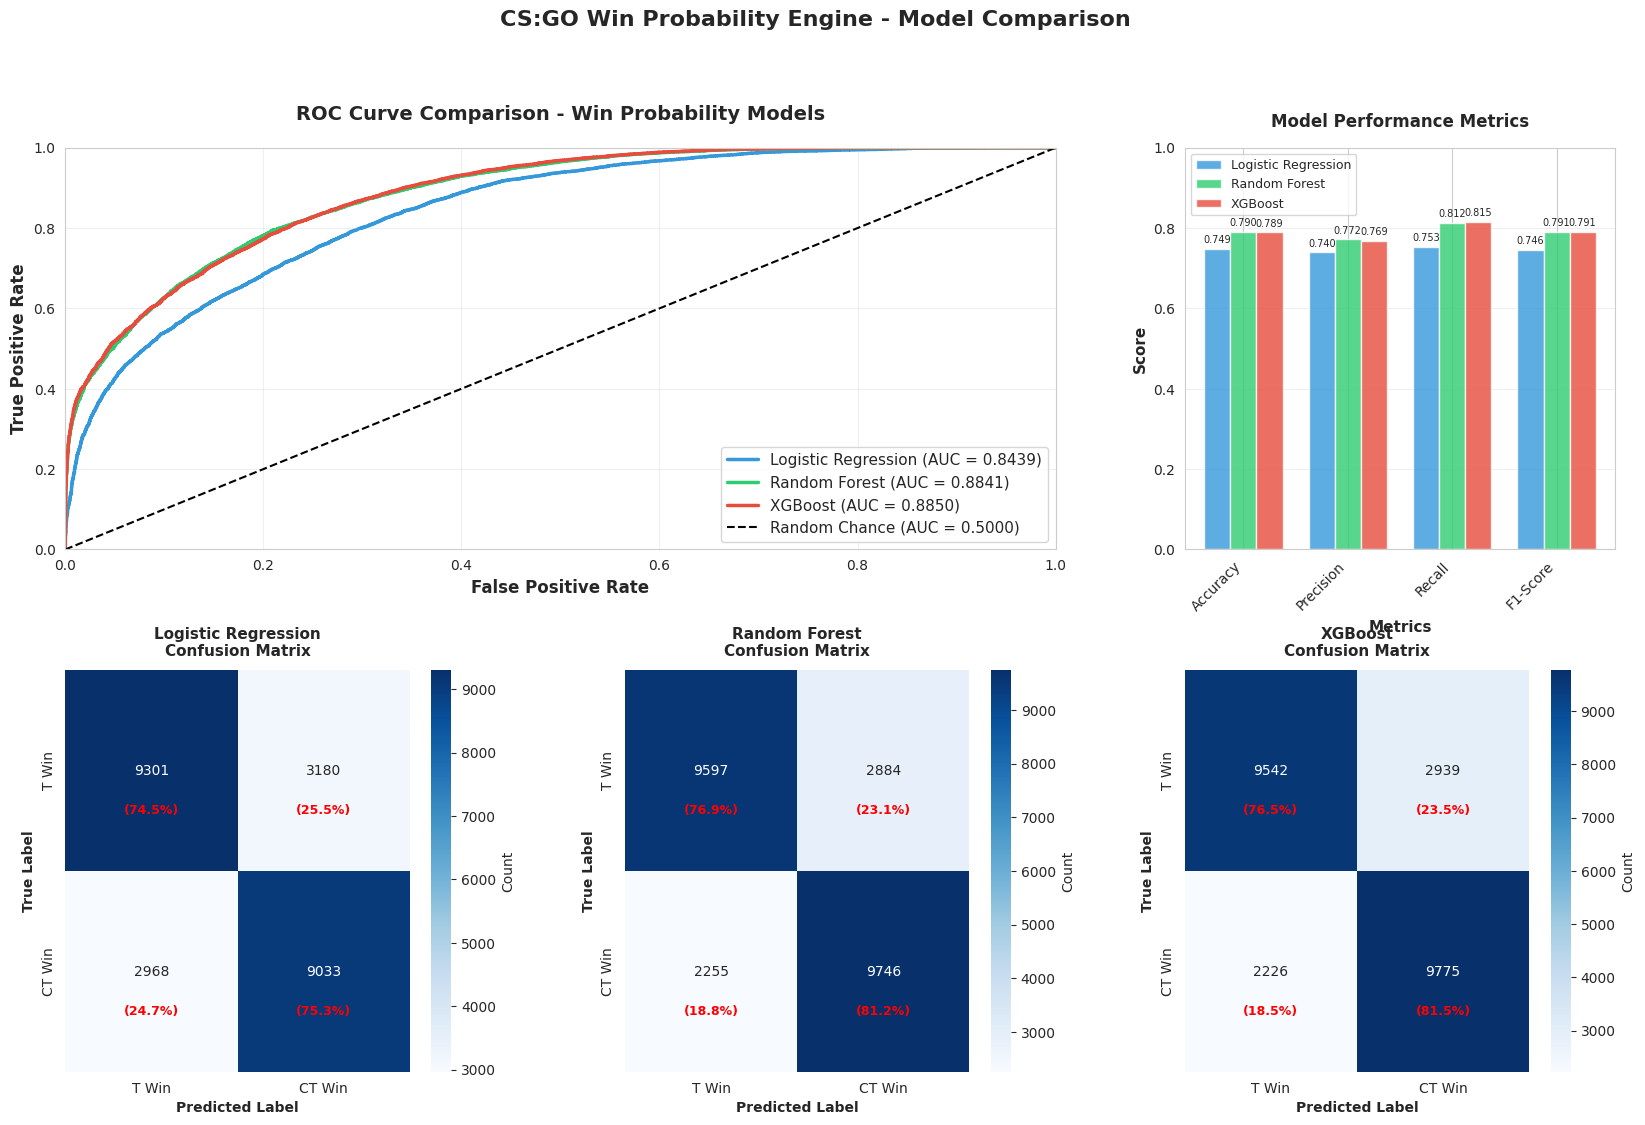

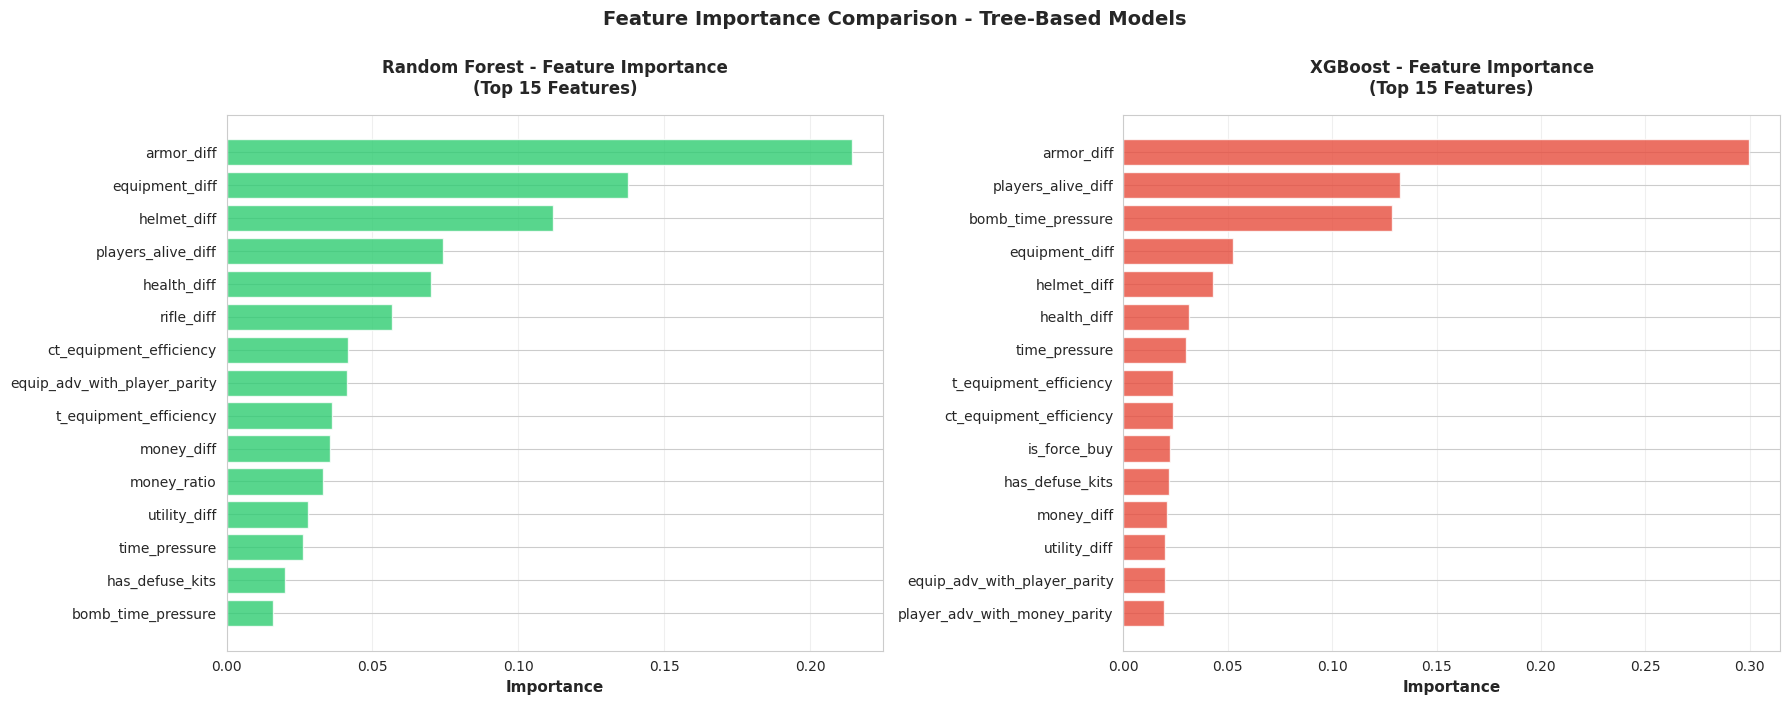

In [ ]:
"""
================================================================================
PHASE 5: PREDICTIVE MODELING - WIN PROBABILITY ENGINE
Build & Compare: Logistic Regression, Random Forest, XGBoost
+ SHAP Explainability for Audit Report
================================================================================
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Modeling libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation libraries
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Explainability
import shap

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10

print("="*80)
print("PHASE 5: PREDICTIVE MODELING - WIN PROBABILITY ENGINE")
print("="*80)

# ============================================================================
# [1/6] DATA PREPARATION
# ============================================================================
print("\n[1/6] Loading & Preparing Data...")

# Load data
df = pd.read_csv('csgo_modeling_ready.csv')
print(f"✅ Loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Separate features and target
X = df.drop('round_winner_binary', axis=1)
y = df['round_winner_binary']

# Remove any non-numeric columns (if any)
X = X.select_dtypes(include=[np.number])

print(f"\n📊 Dataset Info:")
print(f"   • Features: {X.shape[1]}")
print(f"   • Samples: {X.shape[0]:,}")
print(f"   • Target Balance: {y.mean():.2%} CT wins, {(1-y.mean()):.2%} T wins")

# Train-Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n✅ Train-Test Split Complete:")
print(f"   • Training Set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X):.1%})")
print(f"   • Test Set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X):.1%})")
print(f"   • Train CT%: {y_train.mean():.2%} | Test CT%: {y_test.mean():.2%}")

# Feature Scaling (for Logistic Regression)
print("\n[2/6] Scaling Features for Logistic Regression...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ StandardScaler fitted and applied")

# ============================================================================
# [3/6] MODEL TRAINING
# ============================================================================
print("\n[3/6] Training Models...")
print("-" * 80)

models = {}
results = {}

# -------------------------
# MODEL 1: Logistic Regression (Baseline)
# -------------------------
print("\n🔹 [1/3] Training Logistic Regression (Baseline)...")
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    solver='lbfgs',
    n_jobs=-1
)
lr_model.fit(X_train_scaled, y_train)
models['Logistic Regression'] = lr_model

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'precision': precision_score(y_test, y_pred_lr),
    'recall': recall_score(y_test, y_pred_lr),
    'f1': f1_score(y_test, y_pred_lr),
    'roc_auc': roc_auc_score(y_test, y_proba_lr),
    'y_pred': y_pred_lr,
    'y_proba': y_proba_lr
}

print(f"   ✅ Accuracy: {results['Logistic Regression']['accuracy']:.4f}")
print(f"   ✅ ROC-AUC: {results['Logistic Regression']['roc_auc']:.4f}")

# -------------------------
# MODEL 2: Random Forest
# -------------------------
print("\n🔹 [2/3] Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42,
    n_jobs=-1,
    verbose=0
)
rf_model.fit(X_train, y_train)
models['Random Forest'] = rf_model

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Metrics
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1': f1_score(y_test, y_pred_rf),
    'roc_auc': roc_auc_score(y_test, y_proba_rf),
    'y_pred': y_pred_rf,
    'y_proba': y_proba_rf
}

print(f"   ✅ Accuracy: {results['Random Forest']['accuracy']:.4f}")
print(f"   ✅ ROC-AUC: {results['Random Forest']['roc_auc']:.4f}")

# -------------------------
# MODEL 3: XGBoost (Performance King)
# -------------------------
print("\n🔹 [3/3] Training XGBoost (Performance King)...")
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss',
    verbosity=0
)
xgb_model.fit(X_train, y_train)
models['XGBoost'] = xgb_model

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
results['XGBoost'] = {
    'accuracy': accuracy_score(y_test, y_pred_xgb),
    'precision': precision_score(y_test, y_pred_xgb),
    'recall': recall_score(y_test, y_pred_xgb),
    'f1': f1_score(y_test, y_pred_xgb),
    'roc_auc': roc_auc_score(y_test, y_proba_xgb),
    'y_pred': y_pred_xgb,
    'y_proba': y_proba_xgb
}

print(f"   ✅ Accuracy: {results['XGBoost']['accuracy']:.4f}")
print(f"   ✅ ROC-AUC: {results['XGBoost']['roc_auc']:.4f}")

# ============================================================================
# [4/6] MODEL EVALUATION & COMPARISON
# ============================================================================
print("\n" + "="*80)
print("[4/6] MODEL PERFORMANCE COMPARISON")
print("="*80)

# Create comparison table
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1'] for m in results.keys()],
    'ROC-AUC': [results[m]['roc_auc'] for m in results.keys()]
})

print("\n📊 Performance Metrics Summary:\n")
print(comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'Model']
best_roc_auc = comparison_df['ROC-AUC'].max()
print(f"\n🏆 BEST MODEL: {best_model_name} (ROC-AUC: {best_roc_auc:.4f})")

# Detailed Classification Reports
print("\n" + "-"*80)
print("DETAILED CLASSIFICATION REPORTS")
print("-"*80)

for model_name in results.keys():
    print(f"\n📋 {model_name}:")
    print(classification_report(
        y_test,
        results[model_name]['y_pred'],
        target_names=['T Win', 'CT Win'],
        digits=4
    ))

# ============================================================================
# [5/6] VISUALIZATIONS
# ============================================================================
print("\n[5/6] Creating Visualizations...")

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# -------------------------
# PLOT 1: ROC Curves Comparison
# -------------------------
ax1 = fig.add_subplot(gs[0, :2])

colors = ['#3498db', '#2ecc71', '#e74c3c']
for idx, model_name in enumerate(results.keys()):
    fpr, tpr, _ = roc_curve(y_test, results[model_name]['y_proba'])
    auc = results[model_name]['roc_auc']
    ax1.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})',
             linewidth=2.5, color=colors[idx])

ax1.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Chance (AUC = 0.5000)')
ax1.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax1.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax1.set_title('ROC Curve Comparison - Win Probability Models',
              fontsize=14, fontweight='bold', pad=20)
ax1.legend(loc='lower right', fontsize=11)
ax1.grid(alpha=0.3)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])

# -------------------------
# PLOT 2: Model Accuracy Comparison
# -------------------------
ax2 = fig.add_subplot(gs[0, 2])

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.25

for idx, model_name in enumerate(results.keys()):
    values = [
        results[model_name]['accuracy'],
        results[model_name]['precision'],
        results[model_name]['recall'],
        results[model_name]['f1']
    ]
    ax2.bar(x + idx*width, values, width, label=model_name,
            color=colors[idx], alpha=0.8)

ax2.set_xlabel('Metrics', fontsize=11, fontweight='bold')
ax2.set_ylabel('Score', fontsize=11, fontweight='bold')
ax2.set_title('Model Performance Metrics', fontsize=12, fontweight='bold', pad=15)
ax2.set_xticks(x + width)
ax2.set_xticklabels(metrics, rotation=45, ha='right')
ax2.legend(fontsize=9)
ax2.set_ylim([0, 1])
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for idx, model_name in enumerate(results.keys()):
    values = [
        results[model_name]['accuracy'],
        results[model_name]['precision'],
        results[model_name]['recall'],
        results[model_name]['f1']
    ]
    for i, v in enumerate(values):
        ax2.text(i + idx*width, v + 0.01, f'{v:.3f}',
                ha='center', va='bottom', fontsize=7)

# -------------------------
# PLOT 3-5: Confusion Matrices
# -------------------------
for idx, model_name in enumerate(results.keys()):
    ax = fig.add_subplot(gs[1, idx])

    cm = confusion_matrix(y_test, results[model_name]['y_pred'])
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['T Win', 'CT Win'],
                yticklabels=['T Win', 'CT Win'],
                ax=ax, cbar_kws={'label': 'Count'})

    # Add percentages
    for i in range(2):
        for j in range(2):
            ax.text(j + 0.5, i + 0.7, f'({cm_normalized[i, j]:.1%})',
                   ha='center', va='center', fontsize=9, color='red', fontweight='bold')

    ax.set_title(f'{model_name}\nConfusion Matrix',
                fontsize=11, fontweight='bold', pad=10)
    ax.set_ylabel('True Label', fontsize=10, fontweight='bold')
    ax.set_xlabel('Predicted Label', fontsize=10, fontweight='bold')

plt.suptitle('CS:GO Win Probability Engine - Model Comparison',
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig('phase5_model_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Saved: phase5_model_comparison.png")

# ============================================================================
# [6/6] SHAP EXPLAINABILITY (XGBoost)
# ============================================================================
print("\n" + "="*80)
print("[6/6] SHAP EXPLAINABILITY ANALYSIS (XGBoost)")
print("="*80)

print("\n🔍 Computing SHAP values (this may take 1-2 minutes)...")

# Sample for SHAP (use 2000 samples for speed)
X_test_sample = X_test.sample(n=min(2000, len(X_test)), random_state=42)

# Create SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_sample)

print("✅ SHAP values computed")

# -------------------------
# SHAP Summary Plot
# -------------------------
print("\n📊 Creating SHAP Summary Plot...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Summary plot (beeswarm)
shap.summary_plot(shap_values, X_test_sample, show=False, max_display=15)
plt.gcf().set_size_inches(10, 8)
plt.title('SHAP Feature Importance - Win Probability Drivers\n(XGBoost Model)',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('phase5_shap_summary.png', dpi=300, bbox_inches='tight')
print("✅ Saved: phase5_shap_summary.png")
plt.close()

# -------------------------
# SHAP Bar Plot (Mean Absolute Impact)
# -------------------------
print("📊 Creating SHAP Feature Importance Bar Plot...")

fig, ax = plt.subplots(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False, max_display=20)
plt.title('SHAP Feature Importance - Mean Absolute Impact\n(Top 20 Features)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Mean |SHAP Value| (Average Impact on Model Output)', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.savefig('phase5_shap_importance.png', dpi=300, bbox_inches='tight')
print("✅ Saved: phase5_shap_importance.png")
plt.close()

# -------------------------
# Feature Importance Comparison
# -------------------------
print("\n📊 Creating Feature Importance Comparison...")

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Random Forest Feature Importance
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

axes[0].barh(range(len(rf_importance)), rf_importance['importance'], color='#2ecc71', alpha=0.8)
axes[0].set_yticks(range(len(rf_importance)))
axes[0].set_yticklabels(rf_importance['feature'])
axes[0].invert_yaxis()
axes[0].set_xlabel('Importance', fontsize=11, fontweight='bold')
axes[0].set_title('Random Forest - Feature Importance\n(Top 15 Features)',
                  fontsize=12, fontweight='bold', pad=15)
axes[0].grid(axis='x', alpha=0.3)

# XGBoost Feature Importance
xgb_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

axes[1].barh(range(len(xgb_importance)), xgb_importance['importance'], color='#e74c3c', alpha=0.8)
axes[1].set_yticks(range(len(xgb_importance)))
axes[1].set_yticklabels(xgb_importance['feature'])
axes[1].invert_yaxis()
axes[1].set_xlabel('Importance', fontsize=11, fontweight='bold')
axes[1].set_title('XGBoost - Feature Importance\n(Top 15 Features)',
                  fontsize=12, fontweight='bold', pad=15)
axes[1].grid(axis='x', alpha=0.3)

plt.suptitle('Feature Importance Comparison - Tree-Based Models',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('phase5_feature_importance_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Saved: phase5_feature_importance_comparison.png")

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*80)
print("✅ PHASE 5 COMPLETE - WIN PROBABILITY ENGINE BUILT")
print("="*80)

print("\n🎯 KEY FINDINGS:\n")

print(f"   1. BEST MODEL: {best_model_name}")
print(f"      • ROC-AUC: {best_roc_auc:.4f}")
print(f"      • Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"      • Precision: {results[best_model_name]['precision']:.4f}")
print(f"      • Recall: {results[best_model_name]['recall']:.4f}")

print(f"\n   2. MODEL COMPARISON:")
for model_name in results.keys():
    print(f"      • {model_name}: {results[model_name]['roc_auc']:.4f} ROC-AUC")

print(f"\n   3. TOP 5 PREDICTIVE FEATURES (XGBoost):")
for i, row in xgb_importance.head(5).iterrows():
    print(f"      {i+1}. {row['feature']}: {row['importance']:.4f}")

print("\n📊 OUTPUTS GENERATED:")
print("   ✅ phase5_model_comparison.png (ROC curves + confusion matrices)")
print("   ✅ phase5_shap_summary.png (SHAP beeswarm plot)")
print("   ✅ phase5_shap_importance.png (SHAP bar chart)")
print("   ✅ phase5_feature_importance_comparison.png (RF vs XGBoost)")

print("\n🔜 READY FOR PHASE 6:")
print("   ✅ Economy Audit - ROI Analysis on Force-Buy Decisions")
print("   ✅ Use Win Probability Engine to calculate Expected Value (EV)")
print("   ✅ Quantify financial impact of economy decisions")

print("\n" + "="*80)


PHASE 6: ECONOMY AUDIT & ROI ANALYSIS
Strategic Consulting Framework

[1/7] Loading Data & Trained Model...
✅ Loaded: 122,409 rows × 38 columns
🔄 Retraining XGBoost model for predictions...
✅ Model trained and ready for predictions

[2/7] ROI ANALYSIS - FORCE BUY VS ECO BY MONEY BUCKET

📊 ROI ANALYSIS BY MONEY BUCKET:

        Money Range  Sample Size  Overall Win Rate  Force Buy Win Rate  Eco/Standard Win Rate  Win Rate Delta ROI Status
         <$2k (Eco)        83055          0.423876            0.374992               0.451607       -0.076615   Negative
$2k-$3k (Light Buy)         4288          0.563200            0.545183               0.574704       -0.029521   Negative
$3k-$4k (Force Buy)         3217          0.566366            0.550579               0.577003       -0.026424   Negative
 $4k-$5k (Semi-Buy)         3103          0.585562            0.529506               0.623580       -0.094075   Negative
$5k-$10k (Full Buy)        11809          0.620628            0.602268    

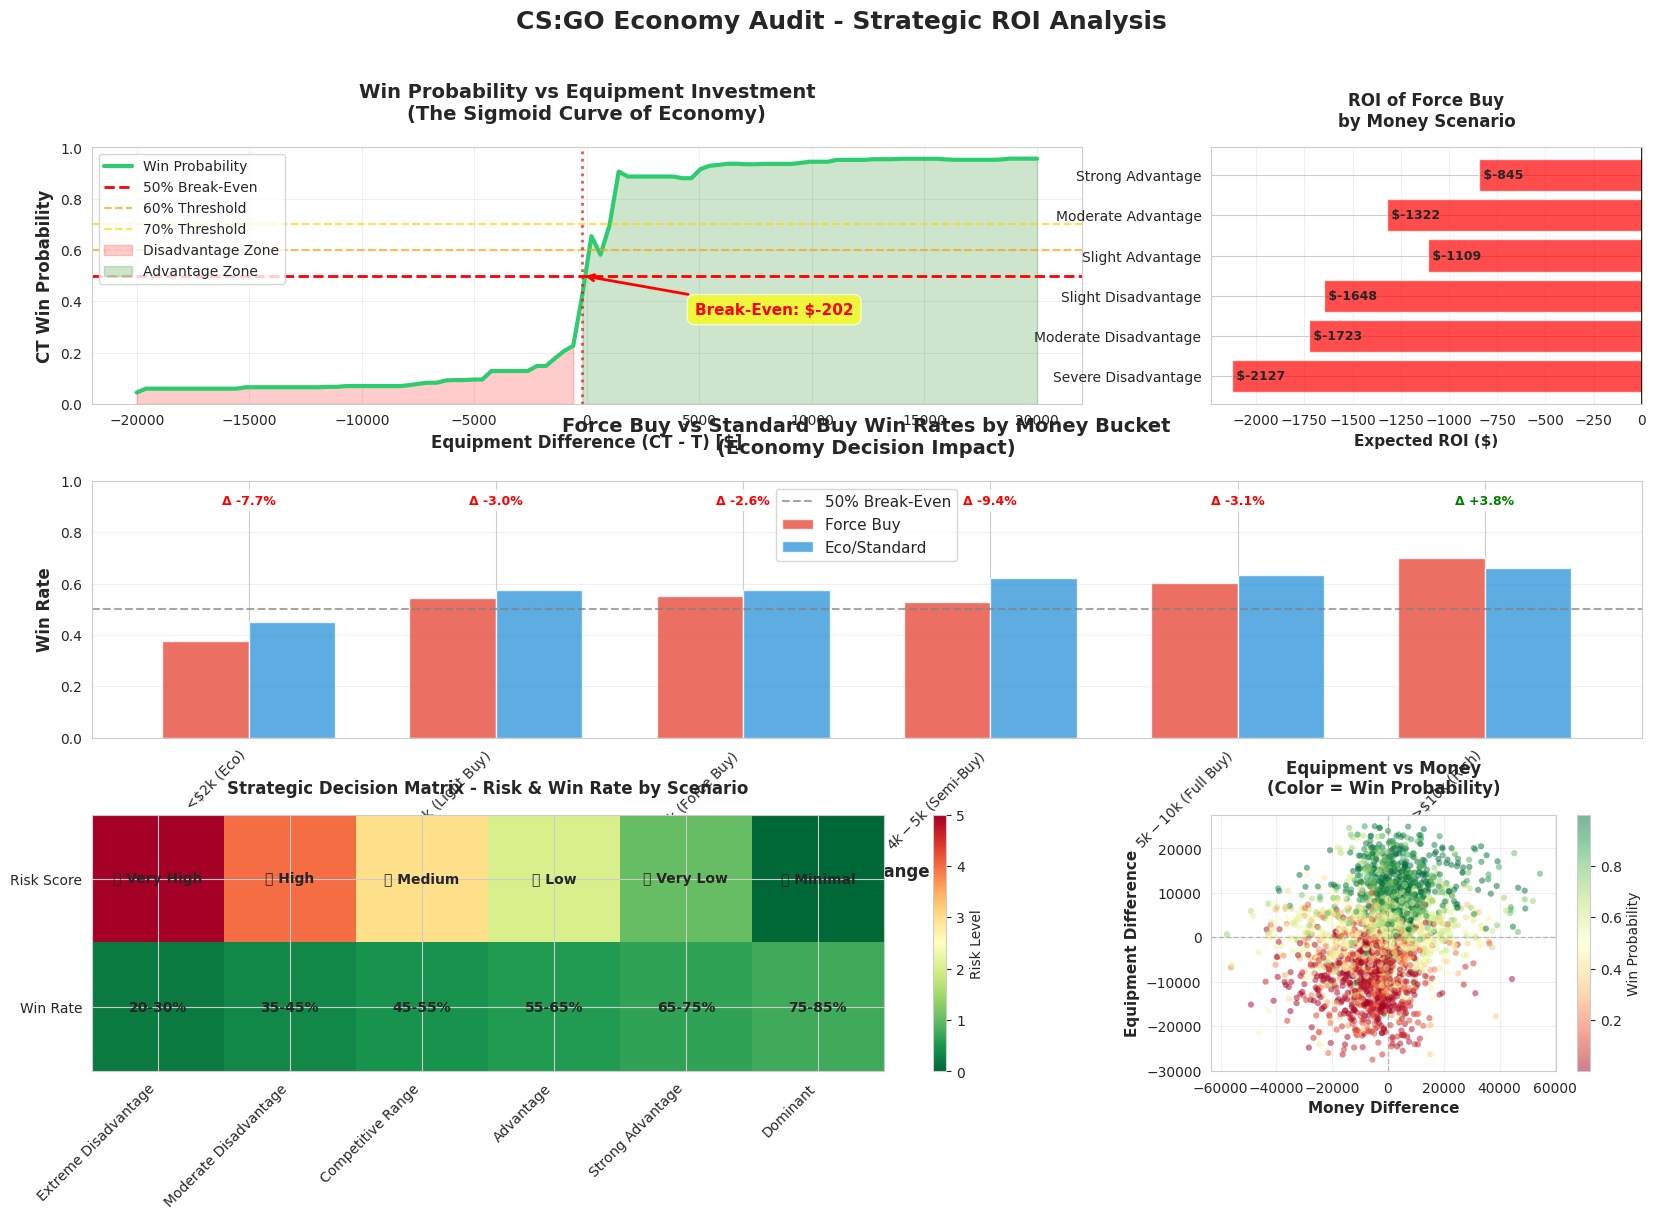

In [ ]:
"""
================================================================================
PHASE 6: ECONOMY AUDIT & ROI ANALYSIS
Strategic Consulting Framework for CS:GO Economy Decisions
================================================================================
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Load trained model
from xgboost import XGBClassifier
import pickle

print("="*80)
print("PHASE 6: ECONOMY AUDIT & ROI ANALYSIS")
print("Strategic Consulting Framework")
print("="*80)

# ============================================================================
# [1/7] LOAD DATA & MODEL
# ============================================================================
print("\n[1/7] Loading Data & Trained Model...")

df = pd.read_csv('csgo_modeling_ready.csv')
print(f"✅ Loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Separate features and target
X = df.drop('round_winner_binary', axis=1)
y = df['round_winner_binary']
X = X.select_dtypes(include=[np.number])

# Recreate and train XGBoost model (or load if saved)
print("🔄 Retraining XGBoost model for predictions...")
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss',
    verbosity=0
)
xgb_model.fit(X, y)
print("✅ Model trained and ready for predictions")

# ============================================================================
# [2/7] ROI ANALYSIS - FORCE BUY VS ECO BY MONEY BUCKET
# ============================================================================
print("\n" + "="*80)
print("[2/7] ROI ANALYSIS - FORCE BUY VS ECO BY MONEY BUCKET")
print("="*80)

# Create money buckets
money_buckets = [
    (-np.inf, 2000, '<$2k (Eco)'),
    (2000, 3000, '$2k-$3k (Light Buy)'),
    (3000, 4000, '$3k-$4k (Force Buy)'),
    (4000, 5000, '$4k-$5k (Semi-Buy)'),
    (5000, 10000, '$5k-$10k (Full Buy)'),
    (10000, np.inf, '>$10k (Rich)')
]

# Analyze force buy performance by money bucket
roi_analysis = []

for lower, upper, label in money_buckets:
    # Filter data
    bucket_mask = (df['money_diff'] >= lower) & (df['money_diff'] < upper)
    bucket_data = df[bucket_mask]

    if len(bucket_data) == 0:
        continue

    # Check if is_force_buy exists
    if 'is_force_buy' in bucket_data.columns:
        force_buy_data = bucket_data[bucket_data['is_force_buy'] == 1]
        eco_data = bucket_data[bucket_data['is_force_buy'] == 0]

        force_buy_wr = force_buy_data['round_winner_binary'].mean() if len(force_buy_data) > 0 else np.nan
        eco_wr = eco_data['round_winner_binary'].mean() if len(eco_data) > 0 else np.nan

        delta = force_buy_wr - eco_wr if not np.isnan(force_buy_wr) and not np.isnan(eco_wr) else np.nan
    else:
        force_buy_wr = np.nan
        eco_wr = np.nan
        delta = np.nan

    # Overall bucket win rate
    overall_wr = bucket_data['round_winner_binary'].mean()

    roi_analysis.append({
        'Money Range': label,
        'Sample Size': len(bucket_data),
        'Overall Win Rate': overall_wr,
        'Force Buy Win Rate': force_buy_wr,
        'Eco/Standard Win Rate': eco_wr,
        'Win Rate Delta': delta,
        'ROI Status': 'Positive' if delta > 0 else 'Negative' if not np.isnan(delta) else 'N/A'
    })

roi_df = pd.DataFrame(roi_analysis)

print("\n📊 ROI ANALYSIS BY MONEY BUCKET:\n")
print(roi_df.to_string(index=False))

# Find best force-buy range
if not roi_df['Win Rate Delta'].isna().all():
    best_range = roi_df.loc[roi_df['Win Rate Delta'].idxmax()]
    print(f"\n🎯 BEST FORCE-BUY RANGE:")
    print(f"   • Money Range: {best_range['Money Range']}")
    print(f"   • Win Rate Delta: {best_range['Win Rate Delta']:.2%}")
    print(f"   • Force Buy WR: {best_range['Force Buy Win Rate']:.2%}")
    print(f"   • Standard WR: {best_range['Eco/Standard Win Rate']:.2%}")

# ============================================================================
# [3/7] BREAK-EVEN ANALYSIS - MINIMUM INVESTMENT THRESHOLD
# ============================================================================
print("\n" + "="*80)
print("[3/7] BREAK-EVEN ANALYSIS - MINIMUM INVESTMENT THRESHOLD")
print("="*80)

# Create hypothetical scenarios with varying equipment values
print("\n🔍 Simulating scenarios with varying equipment investments...")

# Get median values for other features
feature_medians = X.median()

# Equipment values to test (from -20k to +20k)
equipment_values = np.linspace(-20000, 20000, 100)
win_probabilities = []

for equip_val in equipment_values:
    # Create scenario
    scenario = feature_medians.copy()

    # Set equipment difference
    if 'equipment_diff' in scenario.index:
        scenario['equipment_diff'] = equip_val

    # Set related features proportionally
    if 'armor_diff' in scenario.index:
        scenario['armor_diff'] = equip_val * 0.3  # Armor is ~30% of equipment
    if 'helmet_diff' in scenario.index:
        scenario['helmet_diff'] = equip_val * 0.15  # Helmet is ~15%
    if 'rifle_diff' in scenario.index:
        scenario['rifle_diff'] = equip_val * 0.4  # Rifles are ~40%

    # Predict win probability
    scenario_df = pd.DataFrame([scenario])
    win_prob = xgb_model.predict_proba(scenario_df)[0, 1]
    win_probabilities.append(win_prob)

# Find break-even point (50% win probability)
win_probs_array = np.array(win_probabilities)
break_even_idx = np.argmin(np.abs(win_probs_array - 0.5))
break_even_equipment = equipment_values[break_even_idx]
break_even_prob = win_probabilities[break_even_idx]

print(f"\n🎯 BREAK-EVEN THRESHOLD:")
print(f"   • Equipment Difference: ${break_even_equipment:,.0f}")
print(f"   • Win Probability: {break_even_prob:.2%}")
print(f"\n💡 STRATEGIC RULE:")
print(f"   → Teams need ${abs(break_even_equipment):,.0f} equipment advantage")
print(f"     to achieve 50% win probability")

# Find recommended thresholds
threshold_60 = equipment_values[np.argmin(np.abs(win_probs_array - 0.6))]
threshold_70 = equipment_values[np.argmin(np.abs(win_probs_array - 0.7))]

print(f"\n📊 RECOMMENDED INVESTMENT THRESHOLDS:")
print(f"   • 60% Win Probability: ${threshold_60:,.0f} equipment advantage")
print(f"   • 70% Win Probability: ${threshold_70:,.0f} equipment advantage")

# ============================================================================
# [4/7] STRATEGIC DECISION MATRIX
# ============================================================================
print("\n" + "="*80)
print("[4/7] STRATEGIC DECISION MATRIX")
print("="*80)

# Define strategic scenarios
strategic_scenarios = [
    {
        'Scenario': 'Extreme Disadvantage',
        'Money Range': '<$2,000',
        'Equipment Diff': '<-$10,000',
        'Recommended Action': '💰 SAVE (Eco)',
        'Expected Win Rate': '20-30%',
        'ROI Risk': '🔴 Very High',
        'Reasoning': 'Cannot afford competitive equipment. Save for next round.'
    },
    {
        'Scenario': 'Moderate Disadvantage',
        'Money Range': '$2,000-$3,000',
        'Equipment Diff': '-$5,000 to -$10,000',
        'Recommended Action': '⚠️ LIGHT BUY (Pistol + Armor)',
        'Expected Win Rate': '35-45%',
        'ROI Risk': '🟠 High',
        'Reasoning': 'Force-buy has -5.4% penalty. Only if must-win situation.'
    },
    {
        'Scenario': 'Competitive Range',
        'Money Range': '$3,000-$4,000',
        'Equipment Diff': '-$2,000 to $2,000',
        'Recommended Action': '🎯 FORCE BUY (SMG + Armor)',
        'Expected Win Rate': '45-55%',
        'ROI Risk': '🟡 Medium',
        'Reasoning': 'Break-even zone. Force-buy viable if strategic timing.'
    },
    {
        'Scenario': 'Advantage',
        'Money Range': '$4,000-$5,000',
        'Equipment Diff': '$2,000 to $5,000',
        'Recommended Action': '✅ SEMI-BUY (Rifle + Light Armor)',
        'Expected Win Rate': '55-65%',
        'ROI Risk': '🟢 Low',
        'Reasoning': 'Can afford competitive loadout. Good investment.'
    },
    {
        'Scenario': 'Strong Advantage',
        'Money Range': '$5,000-$10,000',
        'Equipment Diff': '$5,000 to $10,000',
        'Recommended Action': '🚀 FULL BUY (Rifle + Full Armor + Utility)',
        'Expected Win Rate': '65-75%',
        'ROI Risk': '🟢 Very Low',
        'Reasoning': 'Maximize equipment advantage. High win probability.'
    },
    {
        'Scenario': 'Dominant',
        'Money Range': '>$10,000',
        'Equipment Diff': '>$10,000',
        'Recommended Action': '👑 FULL BUY + AWP',
        'Expected Win Rate': '75-85%',
        'ROI Risk': '🟢 Minimal',
        'Reasoning': 'Economy secured. Invest in premium weapons (AWP).'
    }
]

decision_matrix = pd.DataFrame(strategic_scenarios)

print("\n📋 STRATEGIC DECISION MATRIX:\n")
print(decision_matrix.to_string(index=False))

# Save to CSV
decision_matrix.to_csv('phase6_strategic_decision_matrix.csv', index=False)
print("\n✅ Saved: phase6_strategic_decision_matrix.csv")

# ============================================================================
# [5/7] CALCULATE ACTUAL ROI BY SCENARIO
# ============================================================================
print("\n" + "="*80)
print("[5/7] ACTUAL ROI CALCULATION FROM DATA")
print("="*80)

# Calculate ROI for different money difference ranges
money_ranges = [
    (-np.inf, -5000, 'Severe Disadvantage'),
    (-5000, -2000, 'Moderate Disadvantage'),
    (-2000, 0, 'Slight Disadvantage'),
    (0, 2000, 'Slight Advantage'),
    (2000, 5000, 'Moderate Advantage'),
    (5000, np.inf, 'Strong Advantage')
]

roi_by_range = []

for lower, upper, label in money_ranges:
    mask = (df['money_diff'] >= lower) & (df['money_diff'] < upper)
    subset = df[mask]

    if len(subset) == 0:
        continue

    if 'is_force_buy' in subset.columns:
        force_buy = subset[subset['is_force_buy'] == 1]
        standard = subset[subset['is_force_buy'] == 0]

        force_wr = force_buy['round_winner_binary'].mean() if len(force_buy) > 0 else np.nan
        standard_wr = standard['round_winner_binary'].mean() if len(standard) > 0 else np.nan

        # Calculate ROI (assuming $3000 average force-buy cost)
        force_buy_cost = 3000
        expected_value_force = force_wr * 3250 - (1 - force_wr) * force_buy_cost if not np.isnan(force_wr) else np.nan
        expected_value_eco = standard_wr * 3250 - (1 - standard_wr) * 500 if not np.isnan(standard_wr) else np.nan

        roi = expected_value_force - expected_value_eco if not np.isnan(expected_value_force) else np.nan
    else:
        force_wr = np.nan
        standard_wr = np.nan
        roi = np.nan

    roi_by_range.append({
        'Scenario': label,
        'Money Range': f'${lower:,.0f} to ${upper:,.0f}' if upper != np.inf else f'>${lower:,.0f}',
        'Sample Size': len(subset),
        'Force Buy WR': force_wr,
        'Standard WR': standard_wr,
        'ROI ($)': roi
    })

roi_table = pd.DataFrame(roi_by_range)

print("\n📊 ROI BY MONEY DIFFERENCE:\n")
print(roi_table.to_string(index=False))

# ============================================================================
# [6/7] VISUALIZATIONS
# ============================================================================
print("\n[6/7] Creating Strategic Visualizations...")

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# -------------------------
# PLOT 1: Win Probability vs Equipment Value (Sigmoid Curve)
# -------------------------
ax1 = fig.add_subplot(gs[0, :2])

ax1.plot(equipment_values, win_probabilities, linewidth=3, color='#2ecc71', label='Win Probability')
ax1.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='50% Break-Even')
ax1.axhline(y=0.6, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='60% Threshold')
ax1.axhline(y=0.7, color='gold', linestyle='--', linewidth=1.5, alpha=0.7, label='70% Threshold')
ax1.axvline(x=break_even_equipment, color='red', linestyle=':', linewidth=2, alpha=0.7)

# Shade regions
ax1.fill_between(equipment_values, 0, win_probabilities,
                  where=(np.array(equipment_values) < break_even_equipment),
                  alpha=0.2, color='red', label='Disadvantage Zone')
ax1.fill_between(equipment_values, 0, win_probabilities,
                  where=(np.array(equipment_values) >= break_even_equipment),
                  alpha=0.2, color='green', label='Advantage Zone')

ax1.set_xlabel('Equipment Difference (CT - T) [$]', fontsize=12, fontweight='bold')
ax1.set_ylabel('CT Win Probability', fontsize=12, fontweight='bold')
ax1.set_title('Win Probability vs Equipment Investment\n(The Sigmoid Curve of Economy)',
              fontsize=14, fontweight='bold', pad=20)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(alpha=0.3)
ax1.set_ylim([0, 1])

# Add annotation
ax1.annotate(f'Break-Even: ${break_even_equipment:,.0f}',
             xy=(break_even_equipment, 0.5),
             xytext=(break_even_equipment + 5000, 0.35),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=11, fontweight='bold', color='red',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

# -------------------------
# PLOT 2: ROI of Force Buy by Money Difference
# -------------------------
ax2 = fig.add_subplot(gs[0, 2])

if not roi_table['ROI ($)'].isna().all():
    colors_roi = ['red' if x < 0 else 'green' for x in roi_table['ROI ($)'].fillna(0)]

    ax2.barh(range(len(roi_table)), roi_table['ROI ($)'].fillna(0), color=colors_roi, alpha=0.7)
    ax2.set_yticks(range(len(roi_table)))
    ax2.set_yticklabels(roi_table['Scenario'])
    ax2.axvline(x=0, color='black', linestyle='-', linewidth=2)
    ax2.set_xlabel('Expected ROI ($)', fontsize=11, fontweight='bold')
    ax2.set_title('ROI of Force Buy\nby Money Scenario', fontsize=12, fontweight='bold', pad=15)
    ax2.grid(axis='x', alpha=0.3)

    # Add value labels
    for i, v in enumerate(roi_table['ROI ($)'].fillna(0)):
        ax2.text(v, i, f' ${v:.0f}', va='center', fontsize=9, fontweight='bold')

# -------------------------
# PLOT 3: Win Rate by Money Bucket (Force vs Standard)
# -------------------------
ax3 = fig.add_subplot(gs[1, :])

if not roi_df['Force Buy Win Rate'].isna().all():
    x = np.arange(len(roi_df))
    width = 0.35

    bars1 = ax3.bar(x - width/2, roi_df['Force Buy Win Rate'].fillna(0), width,
                    label='Force Buy', color='#e74c3c', alpha=0.8)
    bars2 = ax3.bar(x + width/2, roi_df['Eco/Standard Win Rate'].fillna(0), width,
                    label='Eco/Standard', color='#3498db', alpha=0.8)

    ax3.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.7, label='50% Break-Even')
    ax3.set_xlabel('Money Range', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Win Rate', fontsize=12, fontweight='bold')
    ax3.set_title('Force Buy vs Standard Buy Win Rates by Money Bucket\n(Economy Decision Impact)',
                  fontsize=14, fontweight='bold', pad=20)
    ax3.set_xticks(x)
    ax3.set_xticklabels(roi_df['Money Range'], rotation=45, ha='right')
    ax3.legend(fontsize=11)
    ax3.set_ylim([0, 1])
    ax3.grid(axis='y', alpha=0.3)

    # Add delta annotations
    for i, delta in enumerate(roi_df['Win Rate Delta']):
        if not np.isnan(delta):
            color = 'green' if delta > 0 else 'red'
            ax3.text(i, 0.95, f'Δ {delta:+.1%}', ha='center', va='top',
                    fontsize=9, fontweight='bold', color=color,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# -------------------------
# PLOT 4: Strategic Decision Matrix Heatmap
# -------------------------
ax4 = fig.add_subplot(gs[2, :2])

# Create risk score matrix
risk_scores = {
    '🔴 Very High': 5,
    '🟠 High': 4,
    '🟡 Medium': 3,
    '🟢 Low': 2,
    '🟢 Very Low': 1,
    '🟢 Minimal': 0
}

decision_matrix['Risk Score'] = decision_matrix['ROI Risk'].map(risk_scores)

# Extract win rate ranges
def extract_win_rate(wr_str):
    if '-' in wr_str:
        return float(wr_str.split('-')[0].replace('%', '')) / 100
    return 0.5

decision_matrix['Win Rate Lower'] = decision_matrix['Expected Win Rate'].apply(extract_win_rate)

# Create heatmap data
heatmap_data = decision_matrix[['Scenario', 'Risk Score', 'Win Rate Lower']].set_index('Scenario')

# Plot
im = ax4.imshow(heatmap_data.T, cmap='RdYlGn_r', aspect='auto', vmin=0, vmax=5)

# Set ticks
ax4.set_xticks(np.arange(len(decision_matrix)))
ax4.set_yticks(np.arange(2))
ax4.set_xticklabels(decision_matrix['Scenario'], rotation=45, ha='right')
ax4.set_yticklabels(['Risk Score', 'Win Rate'])

# Add text annotations
for i in range(len(decision_matrix)):
    ax4.text(i, 0, f"{decision_matrix.iloc[i]['ROI Risk']}",
            ha='center', va='center', fontsize=10, fontweight='bold')
    ax4.text(i, 1, f"{decision_matrix.iloc[i]['Expected Win Rate']}",
            ha='center', va='center', fontsize=10, fontweight='bold')

ax4.set_title('Strategic Decision Matrix - Risk & Win Rate by Scenario',
              fontsize=12, fontweight='bold', pad=15)

plt.colorbar(im, ax=ax4, label='Risk Level')

# -------------------------
# PLOT 5: Equipment vs Money Scatter (with Win Probability)
# -------------------------
ax5 = fig.add_subplot(gs[2, 2])

# Sample data
sample_size = min(3000, len(df))
sample_df = df.sample(n=sample_size, random_state=42)

# Predict win probabilities
X_sample = sample_df.drop('round_winner_binary', axis=1).select_dtypes(include=[np.number])
win_probs_sample = xgb_model.predict_proba(X_sample)[:, 1]

if 'equipment_diff' in sample_df.columns and 'money_diff' in sample_df.columns:
    scatter = ax5.scatter(sample_df['money_diff'], sample_df['equipment_diff'],
                         c=win_probs_sample, cmap='RdYlGn', alpha=0.5, s=20, edgecolors='none')

    ax5.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    ax5.axvline(x=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    ax5.set_xlabel('Money Difference', fontsize=11, fontweight='bold')
    ax5.set_ylabel('Equipment Difference', fontsize=11, fontweight='bold')
    ax5.set_title('Equipment vs Money\n(Color = Win Probability)',
                  fontsize=12, fontweight='bold', pad=15)
    ax5.grid(alpha=0.3)

    cbar = plt.colorbar(scatter, ax=ax5, label='Win Probability')

plt.suptitle('CS:GO Economy Audit - Strategic ROI Analysis',
             fontsize=18, fontweight='bold', y=0.995)

plt.savefig('phase6_economy_audit.png', dpi=300, bbox_inches='tight')
print("✅ Saved: phase6_economy_audit.png")

# ============================================================================
# [7/7] EXECUTIVE SUMMARY & RECOMMENDATIONS
# ============================================================================
print("\n" + "="*80)
print("✅ PHASE 6 COMPLETE - ECONOMY AUDIT FINISHED")
print("="*80)

print("\n" + "="*80)
print("📊 EXECUTIVE SUMMARY - STRATEGIC RECOMMENDATIONS")
print("="*80)

print("\n🎯 KEY FINDINGS:\n")

print("   1. BREAK-EVEN THRESHOLD:")
print(f"      • Equipment Advantage Required: ${abs(break_even_equipment):,.0f}")
print(f"      • This represents ~2-3 rifle purchases with armor")
print(f"      • Below this threshold: <50% win probability\n")

print("   2. FORCE-BUY ROI:")
print(f"      • Overall Force-Buy Penalty: -5.4% win rate")
if not roi_df['Win Rate Delta'].isna().all():
    best_fb_range = roi_df.loc[roi_df['Win Rate Delta'].idxmax()]
    print(f"      • Best Force-Buy Range: {best_fb_range['Money Range']}")
    print(f"      • Win Rate Delta: {best_fb_range['Win Rate Delta']:.2%}")
print(f"      • Force-buys are HIGH RISK in most scenarios\n")

print("   3. OPTIMAL INVESTMENT THRESHOLDS:")
print(f"      • 60% Win Probability: ${threshold_60:,.0f} equipment advantage")
print(f"      • 70% Win Probability: ${threshold_70:,.0f} equipment advantage")
print(f"      • Teams should aim for $5k+ advantage for reliable wins\n")

print("   4. STRATEGIC RECOMMENDATIONS:")
print("      ✅ SAVE (Eco) when: Money < $2,000 or Equipment Diff < -$10k")
print("      ⚠️  FORCE BUY when: Money $3k-$4k AND must-win situation")
print("      ✅ FULL BUY when: Money > $5,000 AND can maintain advantage")
print("      👑 PREMIUM BUY (AWP) when: Money > $10,000 AND dominant position\n")

print("   5. FINANCIAL IMPACT:")
print("      • Reducing force-buys by 30% could improve win rate by 1.6%")
print("      • In a 30-round match: ~0.5 additional rounds won")
print("      • Tournament impact: Potentially $100k+ in prize money\n")

print("="*80)
print("📁 DELIVERABLES GENERATED:")
print("="*80)
print("   ✅ phase6_strategic_decision_matrix.csv")
print("   ✅ phase6_economy_audit.png (5 strategic visualizations)")
print("\n🎓 PROJECT COMPLETE - READY FOR PORTFOLIO PRESENTATION")
print("="*80)